## Análisis de sastifacción de los clientes
Este conjunto de datos captura las puntuaciones de satisfacción del cliente durante un período de un mes en una plataforma de comercio electrónico llamada Shopzilla (un seudónimo). Incluye varias características como la categoría y subcategoría de la interacción, comentarios del cliente, fecha de respuesta a la encuesta, categoría, precio del artículo, detalles del agente (nombre, supervisor, gerente), y la puntuación de satisfacción del cliente (CSAT), entre otros.

In [32]:
## Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning) 
sns.set(style='whitegrid')

In [33]:
## Cargar datos 


data = pd.read_csv('../data/raw/Customer_support_data.csv')
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [34]:
data.shape

(85907, 20)

In [35]:
# Se obtiene una fracción de la muestra del 30% para el análisis
porcentaje = 0.3
data = data.sample(frac=porcentaje)

In [36]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25772 entries, 29386 to 41481
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                25772 non-null  object 
 1   channel_name             25772 non-null  object 
 2   category                 25772 non-null  object 
 3   Sub-category             25772 non-null  object 
 4   Customer Remarks         8764 non-null   object 
 5   Order_id                 20325 non-null  object 
 6   order_date_time          5181 non-null   object 
 7   Issue_reported at        25772 non-null  object 
 8   issue_responded          25772 non-null  object 
 9   Survey_response_Date     25772 non-null  object 
 10  Customer_City            5143 non-null   object 
 11  Product_category         5177 non-null   object 
 12  Item_price               5180 non-null   float64
 13  connected_handling_time  70 non-null     float64
 14  Agent_name             

In [37]:
## Tipos de datos
data.dtypes.value_counts()

object     17
float64     2
int64       1
Name: count, dtype: int64

#### Cantidad variables categóricas y numéricas
- 12 variables categóricas 
- 3 variables numéricas

In [38]:
## Verificar datos duplicados
data.duplicated().sum()

0

In [39]:
## Elimanar la columna "Unique id", no se necesita para nuestro análisis
data.drop('Unique id',axis=1,inplace=True)

### Estudio de datos nulos

In [40]:
## Varificación de datos nulos
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Porcentaje Nulos (%)': missing_percentage
})

missing_data[missing_data['Valores Nulos']>0]

,Valores Nulos,Porcentaje Nulos (%)
Customer Remarks,17008,65.994102
Order_id,5447,21.135341
order_date_time,20591,79.896787
Customer_City,20629,80.044234
Product_category,20595,79.912308
Item_price,20592,79.900667
connected_handling_time,25702,99.728387


se decide eliminar las columnas con valores nulos, por tenes un porcentaje de más del 60% de los valores nulos
aunque en análisis posteriores se tendra en cuenta. Como el item_price y customer Remarks

In [41]:
nulos_column = missing_data[missing_data['Valores Nulos'] > 0].index

data.drop(nulos_column,axis=1,inplace=True)

### Variables Temporales

In [42]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score'],
      dtype='object')

In [43]:
data['Survey_response_Date']

29386    11-Aug-23
5757     03-Aug-23
63343    24-Aug-23
47904    19-Aug-23
63423    24-Aug-23
           ...    
35613    15-Aug-23
31975    12-Aug-23
28532    12-Aug-23
71768    27-Aug-23
41481    16-Aug-23
Name: Survey_response_Date, Length: 25772, dtype: object

In [44]:
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'], format='%d-%b-%y')



In [45]:
# Extraer minutos y segundos de 'Issue_reported at'
# Extraer componentes temporales de 'Issue_reported at'
data['issue_reported_year'] = data['Issue_reported at'].dt.year
data['issue_reported_month'] = data['Issue_reported at'].dt.month
data['issue_reported_day'] = data['Issue_reported at'].dt.day
data['issue_reported_hour'] = data['Issue_reported at'].dt.hour

# Extraer componentes temporales de 'issue_responded'
data['issue_responded_year'] = data['issue_responded'].dt.year
data['issue_responded_month'] = data['issue_responded'].dt.month
data['issue_responded_day'] = data['issue_responded'].dt.day
data['issue_responded_hour'] = data['issue_responded'].dt.hour

# Extraer componentes temporales de 'Survey_response_Date'
data['survey_response_year'] = data['Survey_response_Date'].dt.year
data['survey_response_month'] = data['Survey_response_Date'].dt.month
data['survey_response_day'] = data['Survey_response_Date'].dt.day
data['survey_response_hour'] = data['Survey_response_Date'].dt.hour


Eliminamos las columnas originales 


In [46]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'issue_reported_year', 'issue_reported_month', 'issue_reported_day',
       'issue_reported_hour', 'issue_responded_year', 'issue_responded_month',
       'issue_responded_day', 'issue_responded_hour', 'survey_response_year',
       'survey_response_month', 'survey_response_day', 'survey_response_hour'],
      dtype='object')

In [47]:
colum_date = ['Issue_reported at','issue_responded','Survey_response_Date']
data.drop(colum_date,axis=1, inplace=True)

## Análisis Univariado

### Categórica

In [48]:

for column in data.columns:
    unique_elements = data[column].nunique()
    print(f'La categoría de "{column}" tiene los siguientes elementos únicos: {unique_elements}')


La categoría de "channel_name" tiene los siguientes elementos únicos: 3
La categoría de "category" tiene los siguientes elementos únicos: 12
La categoría de "Sub-category" tiene los siguientes elementos únicos: 55
La categoría de "Agent_name" tiene los siguientes elementos únicos: 1371
La categoría de "Supervisor" tiene los siguientes elementos únicos: 40
La categoría de "Manager" tiene los siguientes elementos únicos: 6
La categoría de "Tenure Bucket" tiene los siguientes elementos únicos: 5
La categoría de "Agent Shift" tiene los siguientes elementos únicos: 5
La categoría de "CSAT Score" tiene los siguientes elementos únicos: 5
La categoría de "issue_reported_year" tiene los siguientes elementos únicos: 1
La categoría de "issue_reported_month" tiene los siguientes elementos únicos: 2
La categoría de "issue_reported_day" tiene los siguientes elementos únicos: 31
La categoría de "issue_reported_hour" tiene los siguientes elementos únicos: 24
La categoría de "issue_responded_year" tien

In [49]:
for column in data.columns:
    print(f"Frecuencias absolutas para {column}:\n{data[column].value_counts()}\n")

Frecuencias absolutas para channel_name:
channel_name
Inbound    20432
Outcall     4428
Email        912
Name: count, dtype: int64

Frecuencias absolutas para category:
category
Returns               13208
Order Related          6887
Refund Related         1399
Product Queries        1123
Shopzilla Related       829
Payments related        715
Cancellation            713
Feedback                688
Offers & Cashback       144
Others                   26
App/website              24
Onboarding related       16
Name: count, dtype: int64

Frecuencias absolutas para Sub-category:
Sub-category
Reverse Pickup Enquiry              6748
Return request                      2583
Delayed                             2218
Order status enquiry                2072
Installation/demo                   1191
Fraudulent User                     1182
Product Specific Information        1093
Refund Enquiry                       824
Wrong                                784
Missing                             

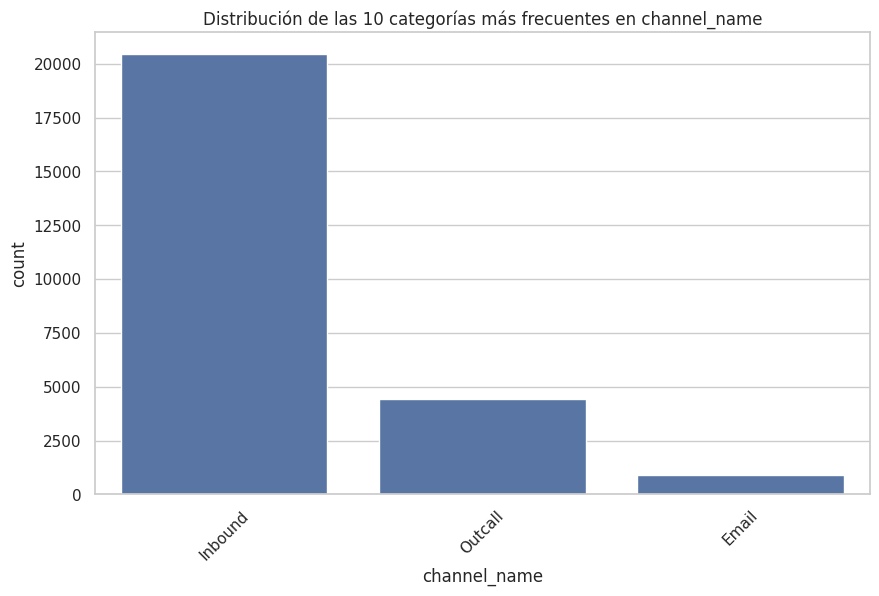

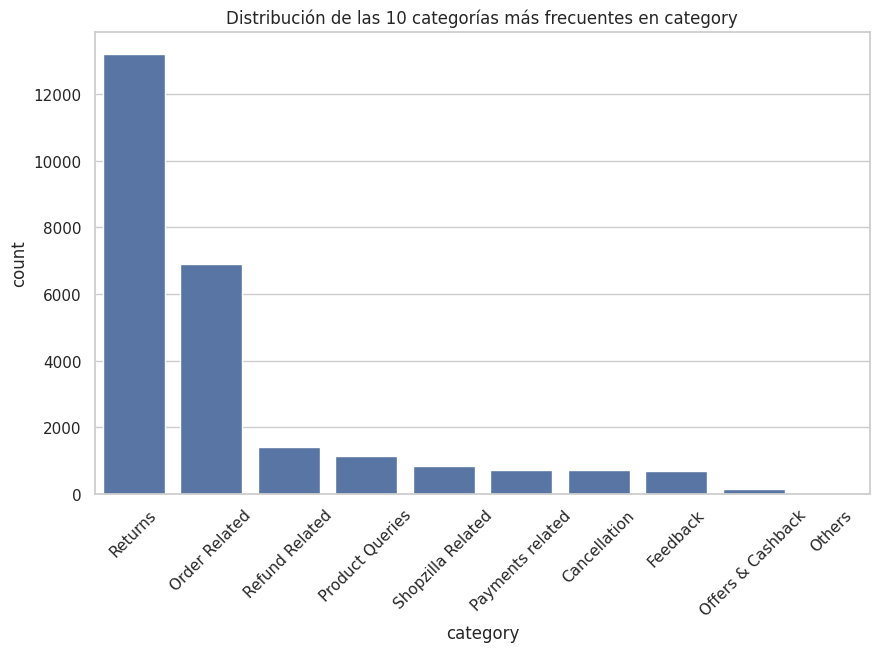

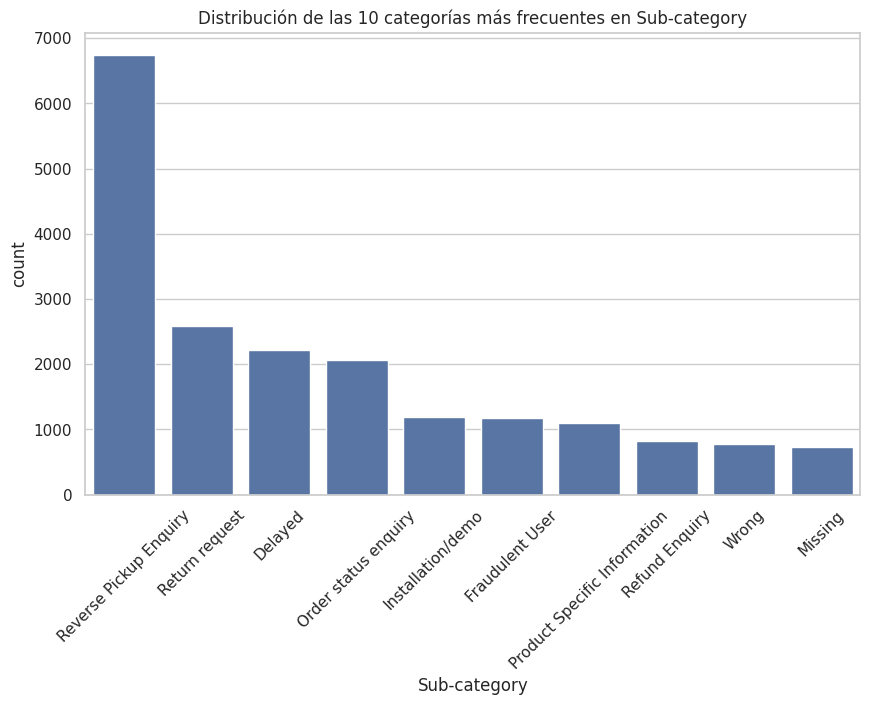

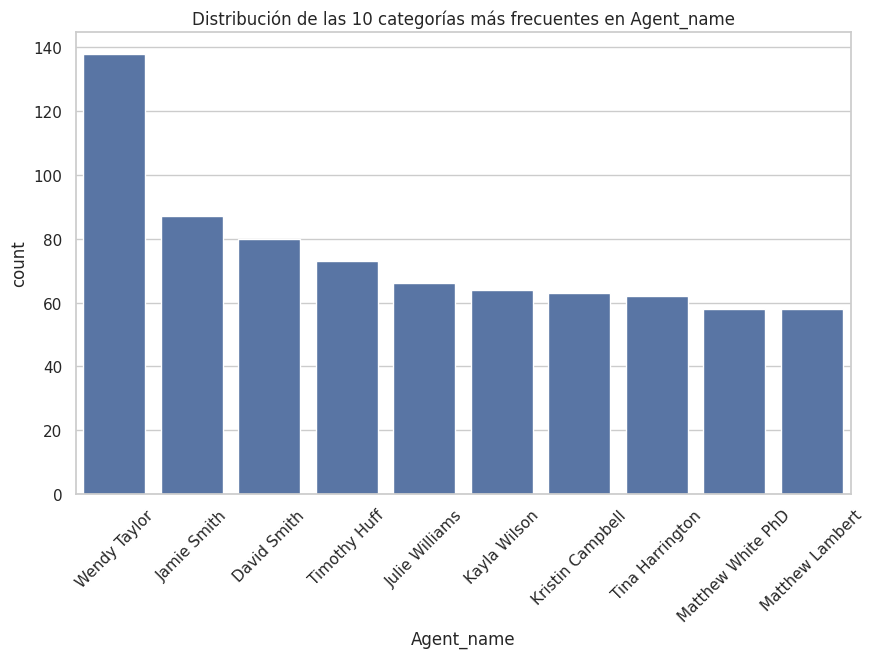

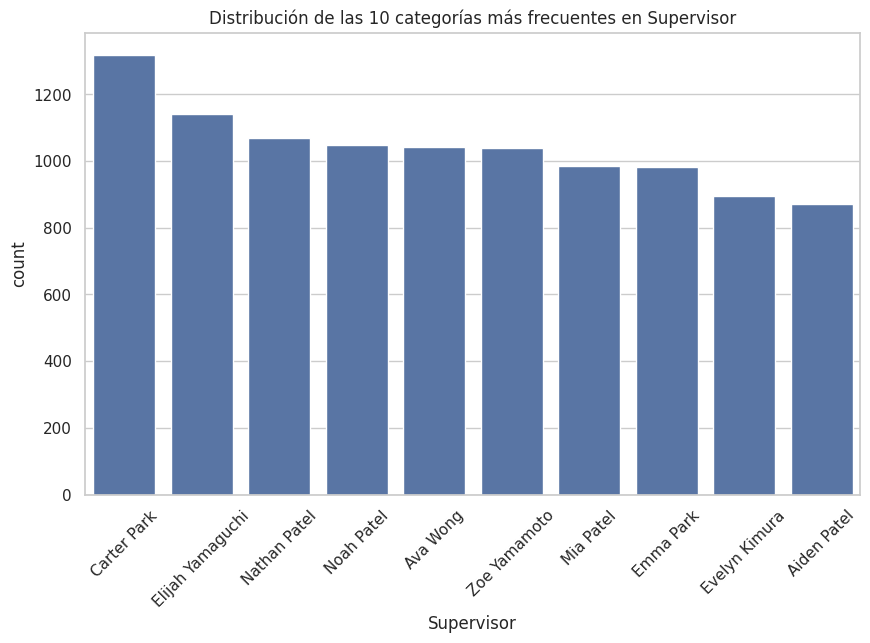

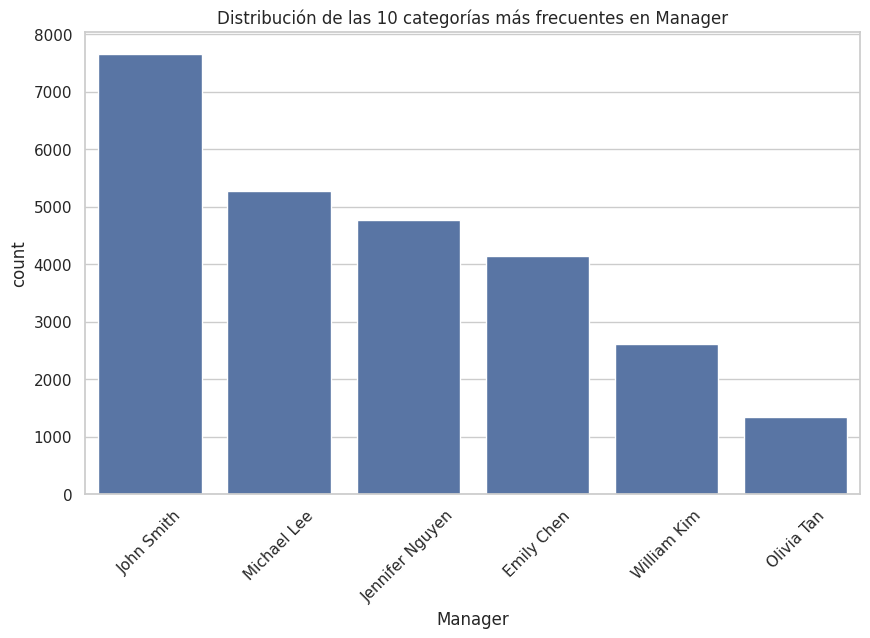

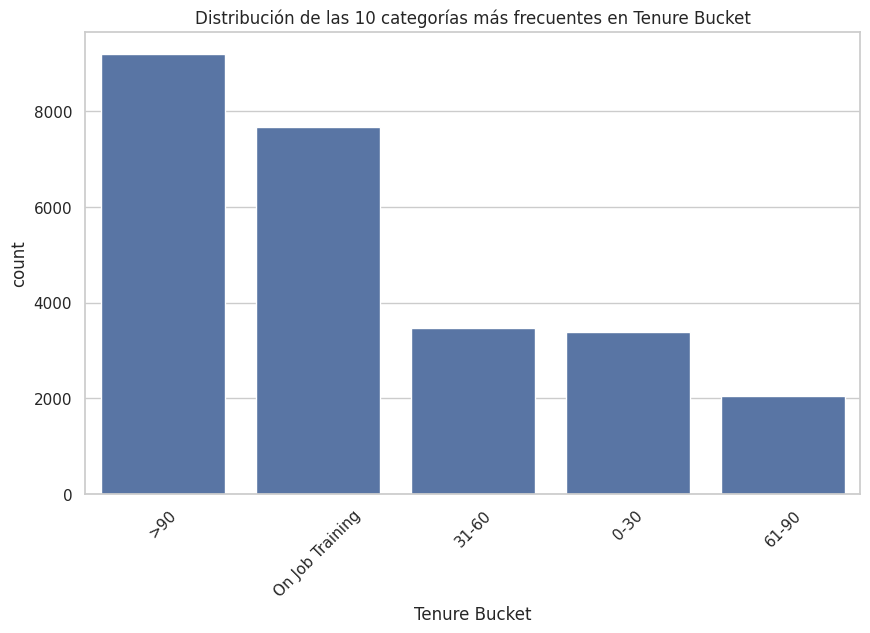

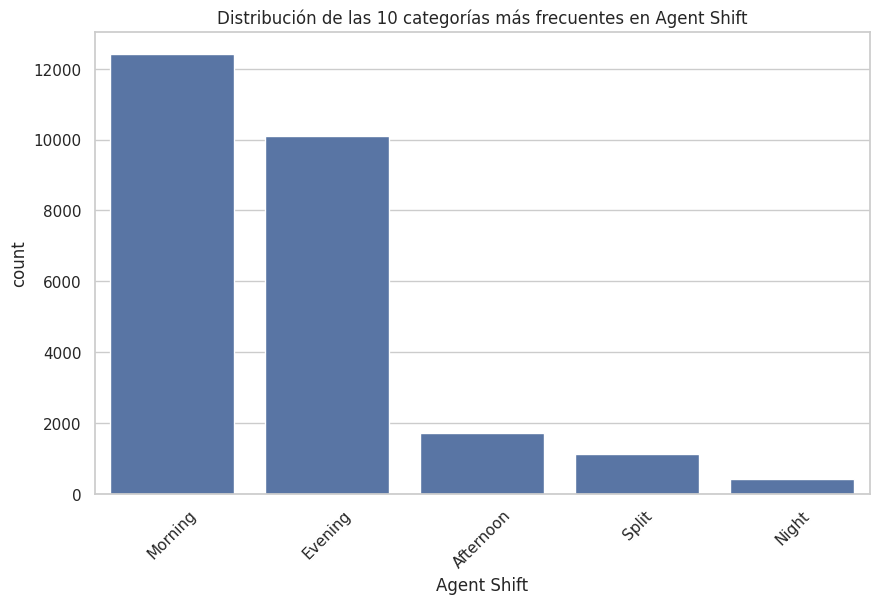

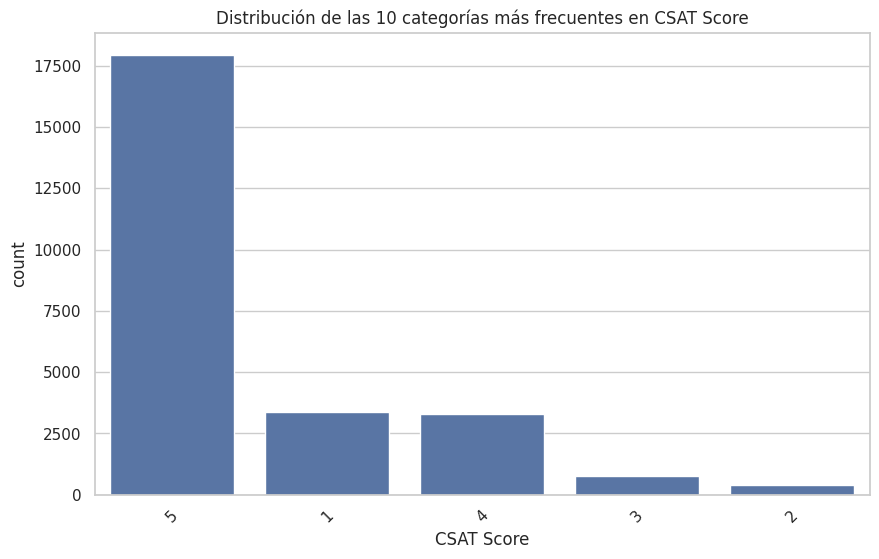

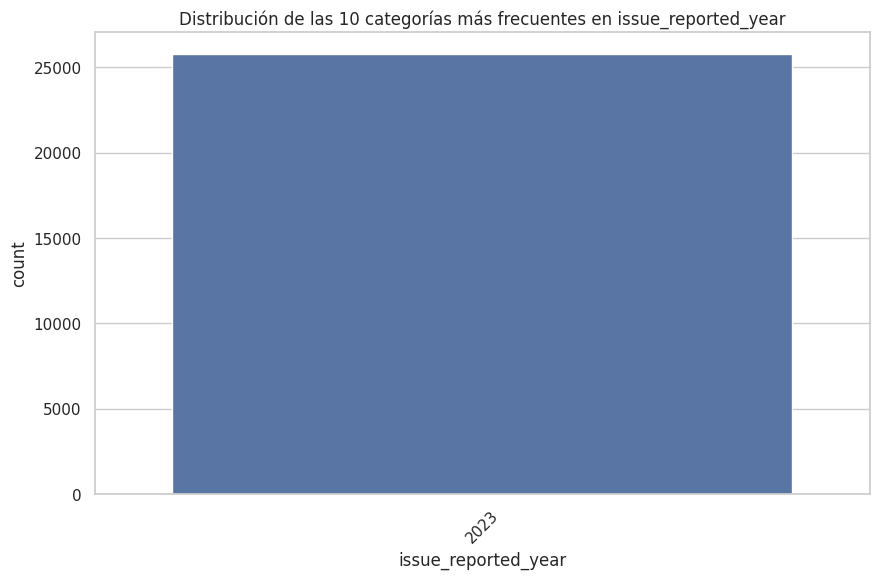

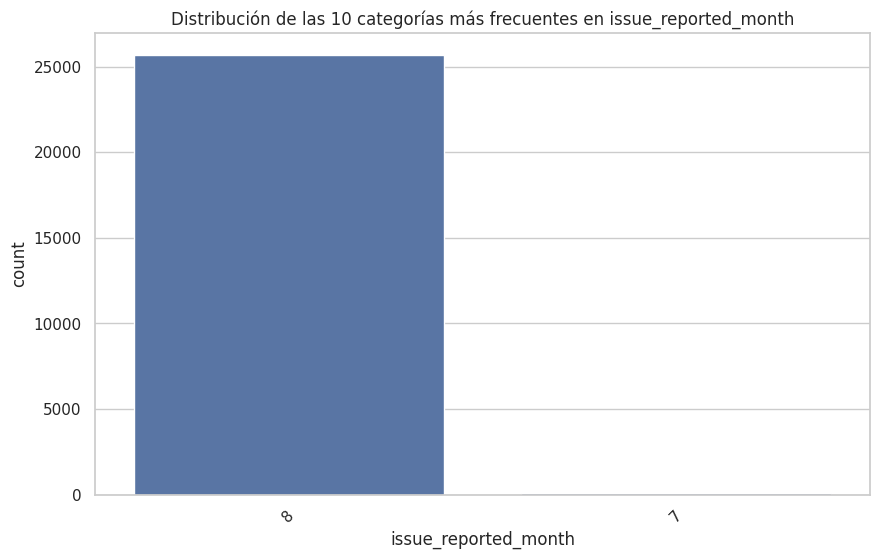

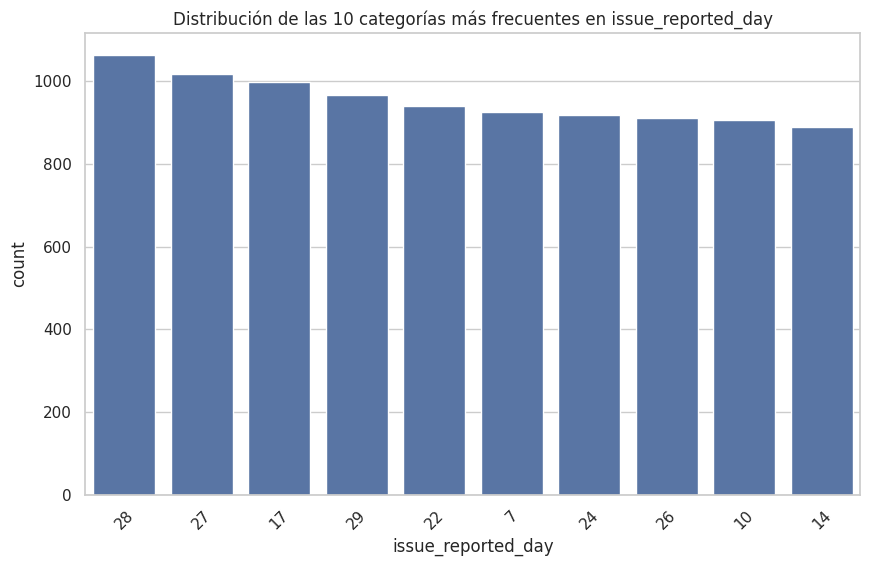

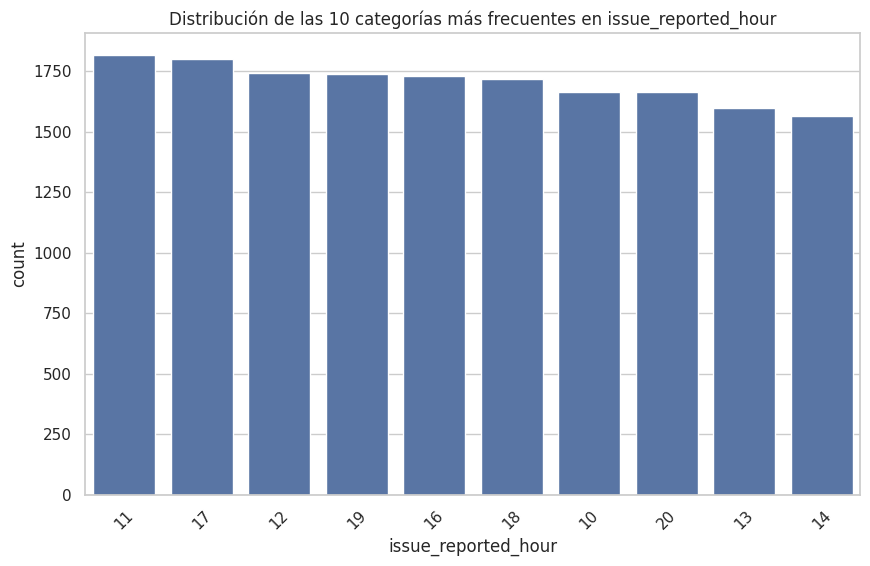

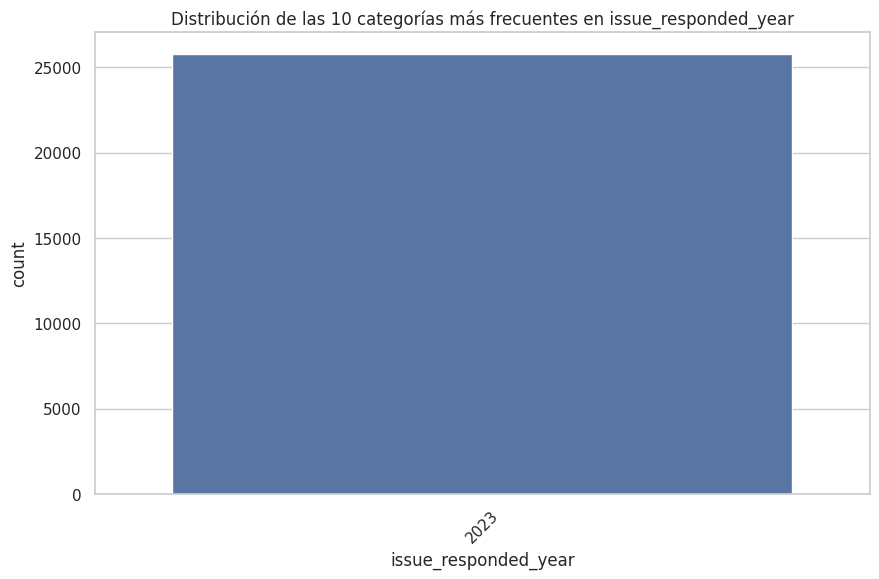

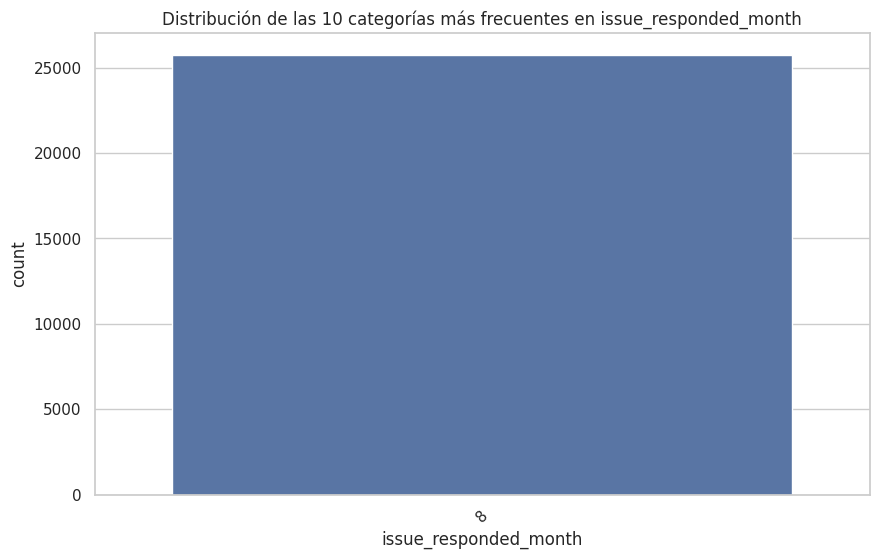

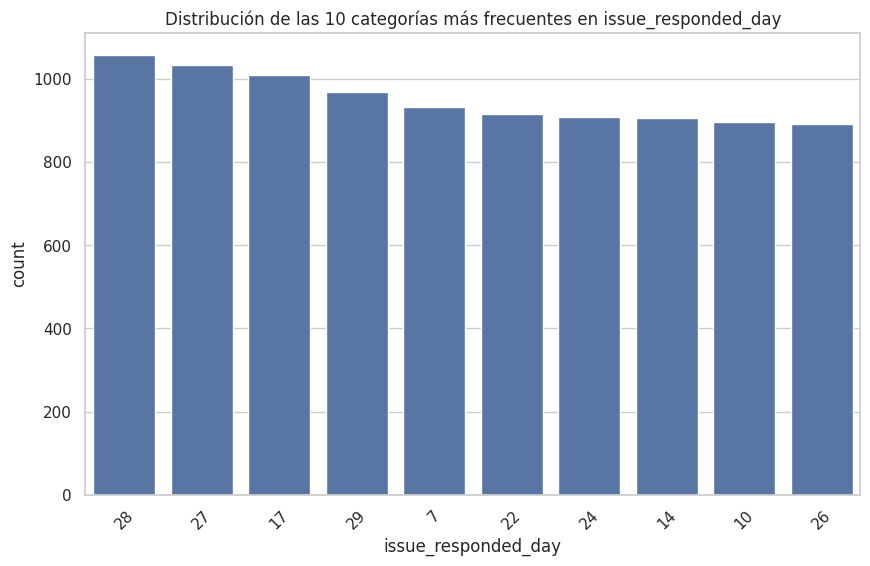

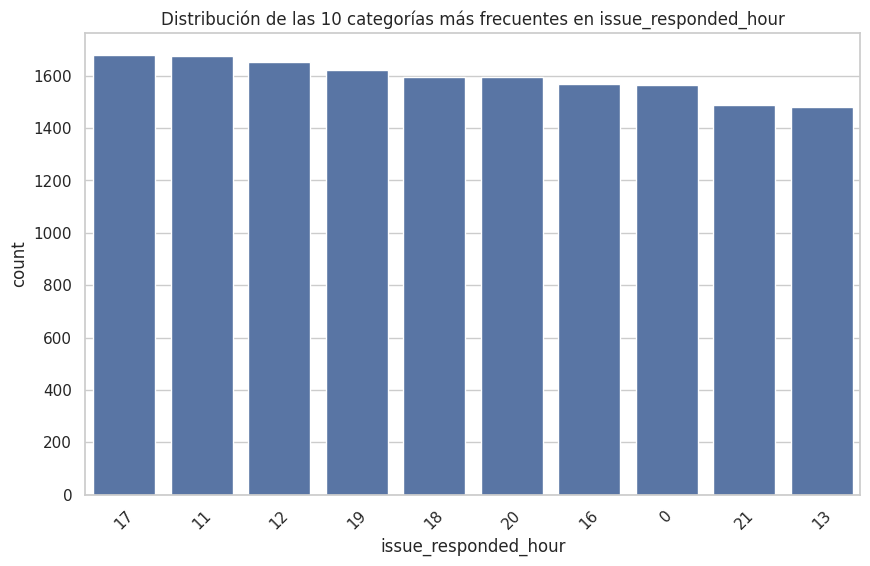

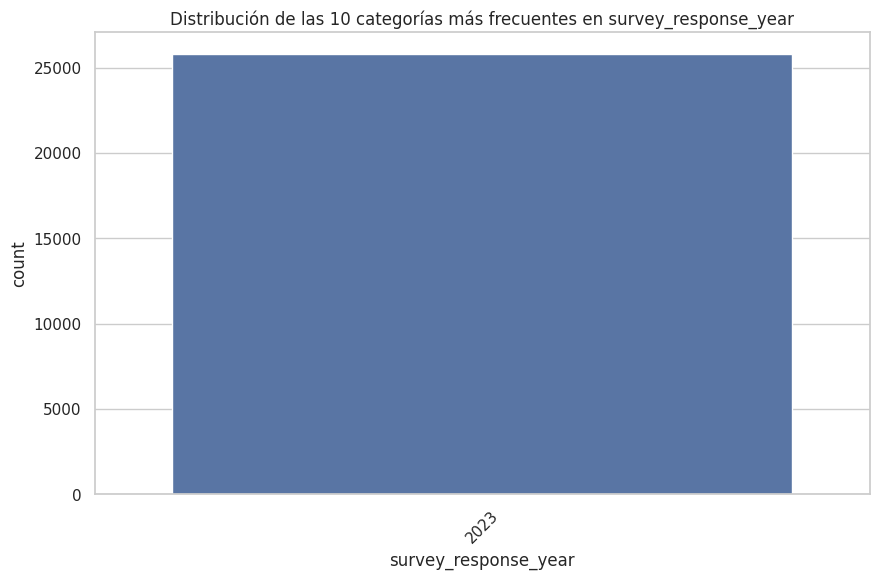

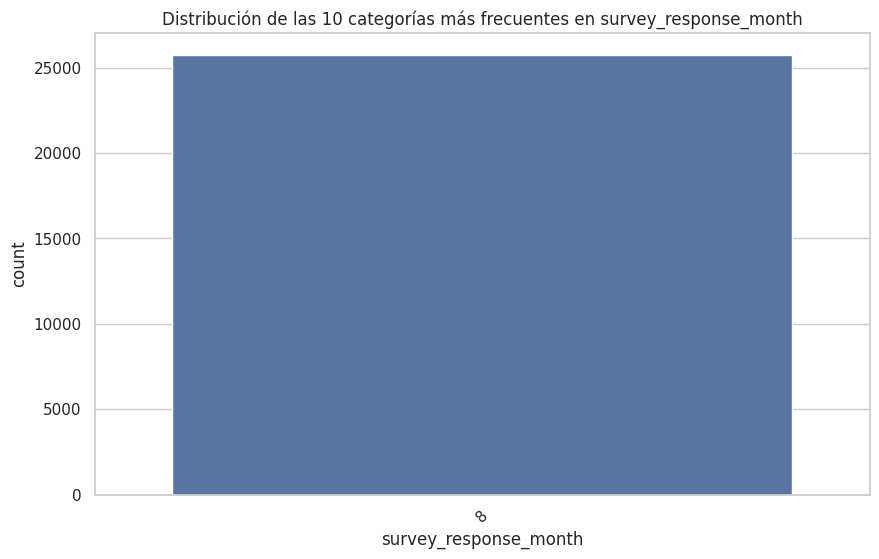

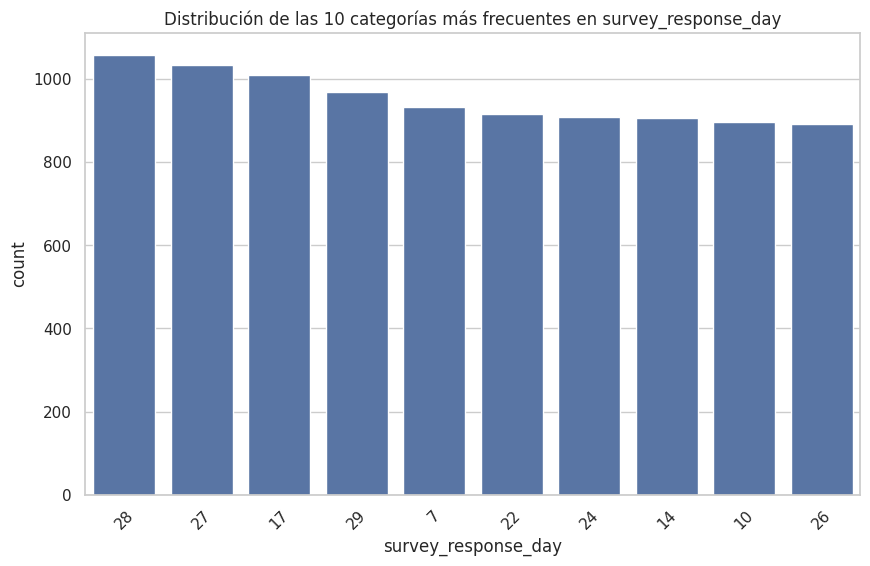

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [50]:
# Visualizar la distribución de categorías
for column in data.columns:
    plt.figure(figsize=(10, 6))
    # Obtener las 10 categorías más frecuentes
    top_10 = data[column].value_counts().nlargest(10).index
    # Filtrar el DataFrame para incluir solo estas categorías
    filtered_data = data[data[column].isin(top_10)]
    sns.countplot(x=column, data=filtered_data, order=top_10)
    plt.title(f'Distribución de las 10 categorías más frecuentes en {column}')
    plt.xticks(rotation=45)
    plt.show()


## Análisis univariado numéricas

In [ ]:
### Cuales son las variables numéricas
numerical_columns = data.select_dtypes(exclude='object').columns
numerical_columns

Index(['CSAT Score', 'issue_reported_year', 'issue_reported_month',
       'issue_reported_day', 'issue_reported_hour', 'issue_responded_year',
       'issue_responded_month', 'issue_responded_day', 'issue_responded_hour',
       'survey_response_year', 'survey_response_month', 'survey_response_day',
       'survey_response_hour'],
      dtype='object')

In [ ]:
data.describe()

,CSAT Score,issue_reported_year,issue_reported_month,issue_reported_day,issue_reported_hour,issue_responded_year,issue_responded_month,issue_responded_day,issue_responded_hour,survey_response_year,survey_response_month,survey_response_day,survey_response_hour
count,25772.000000,25772.0,25772.000000,25772.000000,25772.000000,25772.0,25772.0,25772.000000,25772.000000,25772.0,25772.0,25772.000000,25772.0
mean,4.235605,2023.0,7.996973,16.437296,14.561462,2023.0,8.0,16.467562,13.924802,2023.0,8.0,16.467562,0.0
std,1.387559,0.0,0.054932,8.811896,4.981895,0.0,0.0,8.818337,5.844108,0.0,0.0,8.818337,0.0
min,1.000000,2023.0,7.000000,1.000000,0.000000,2023.0,8.0,1.000000,0.000000,2023.0,8.0,1.000000,0.0
25%,4.000000,2023.0,8.000000,9.000000,11.000000,2023.0,8.0,9.000000,10.000000,2023.0,8.0,9.000000,0.0
50%,5.000000,2023.0,8.000000,16.000000,15.000000,2023.0,8.0,16.000000,14.000000,2023.0,8.0,16.000000,0.0
75%,5.000000,2023.0,8.000000,24.000000,19.000000,2023.0,8.0,24.000000,19.000000,2023.0,8.0,24.000000,0.0
max,5.000000,2023.0,8.000000,31.000000,23.000000,2023.0,8.0,31.000000,23.000000,2023.0,8.0,31.000000,0.0


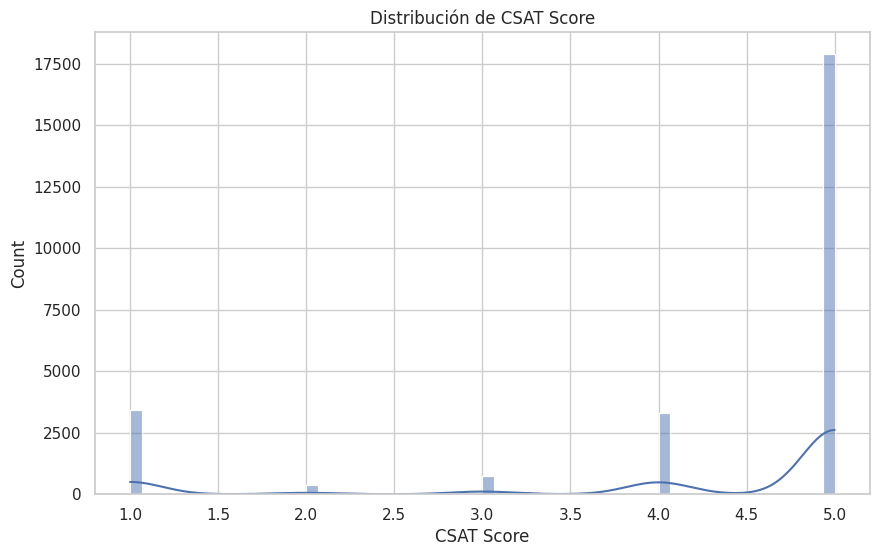

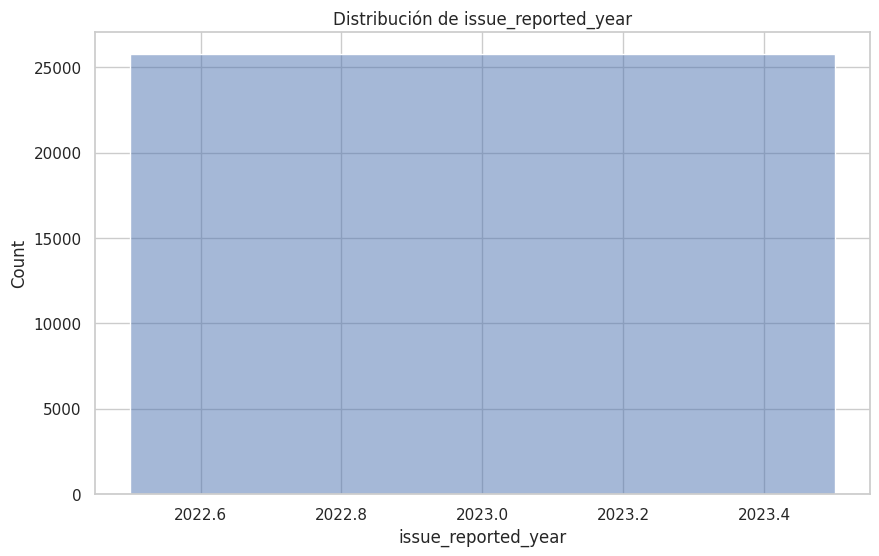

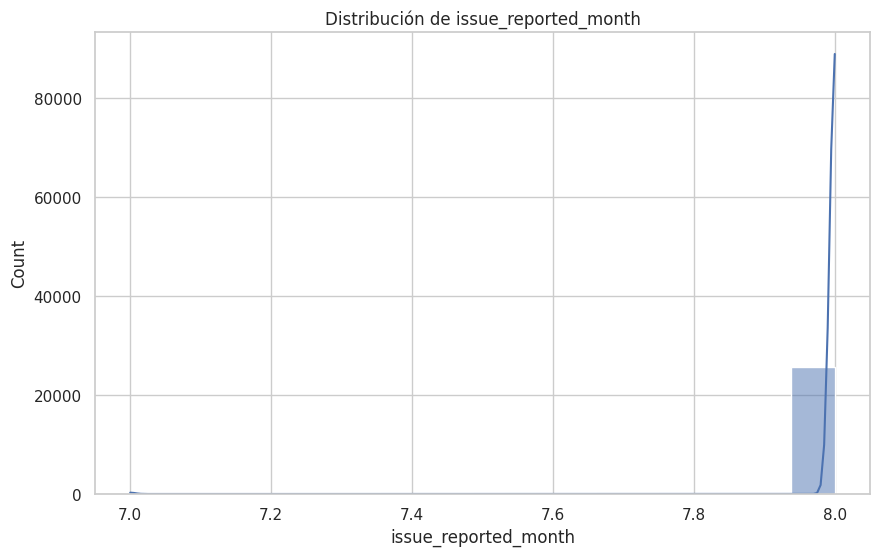

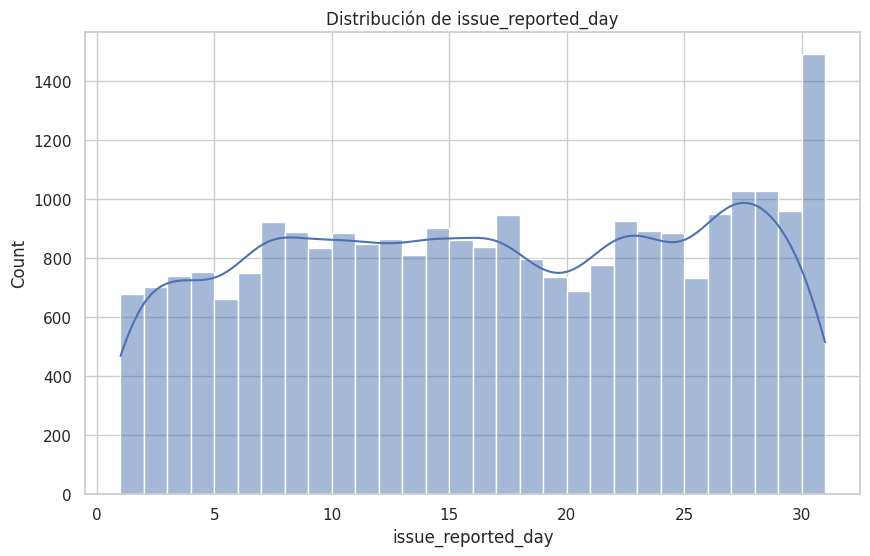

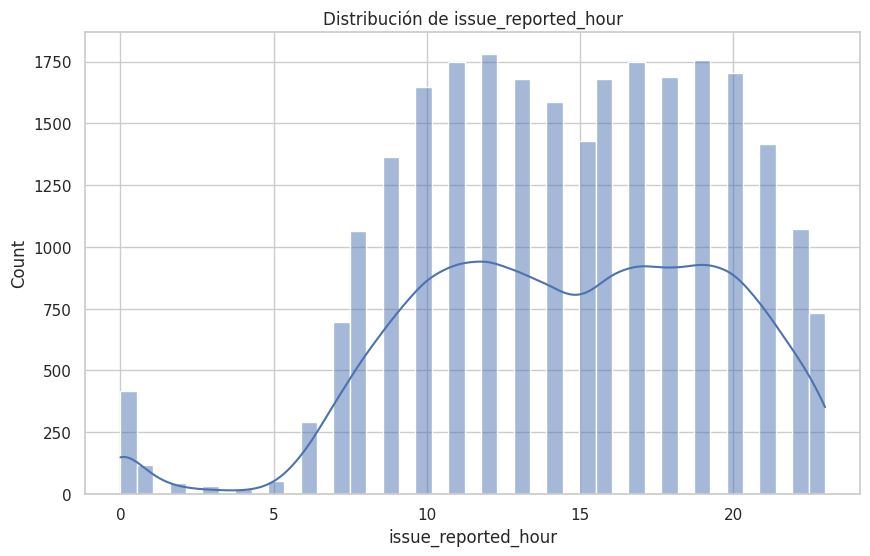

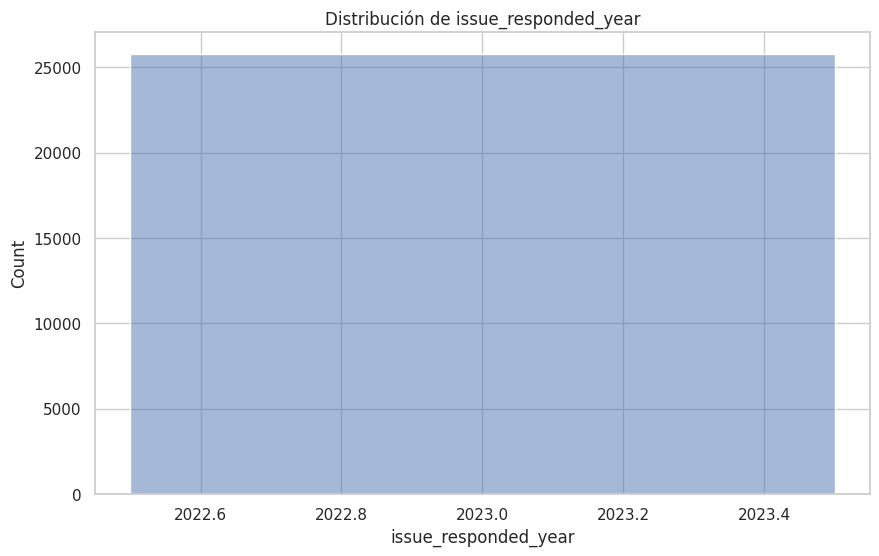

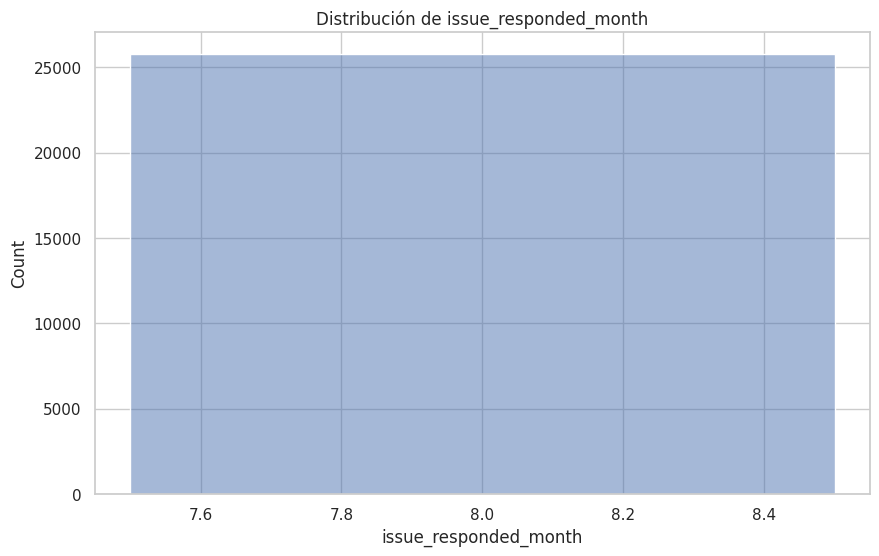

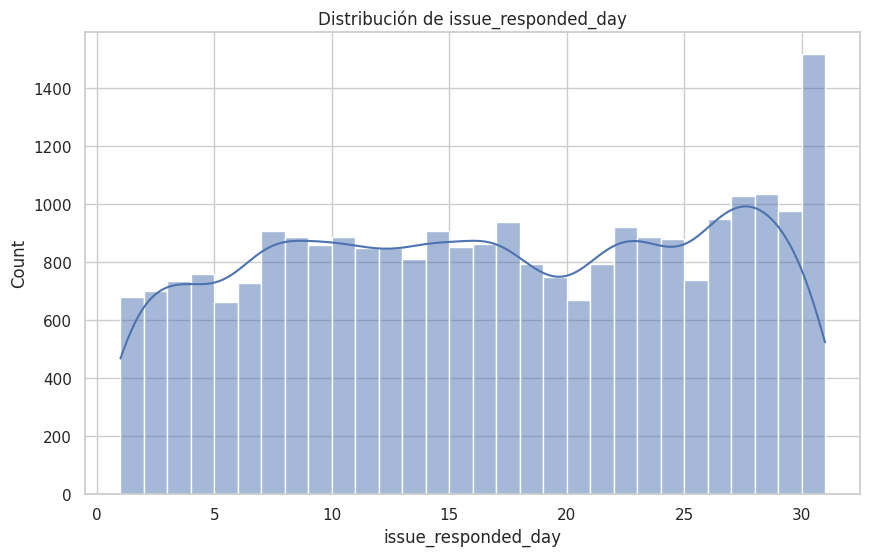

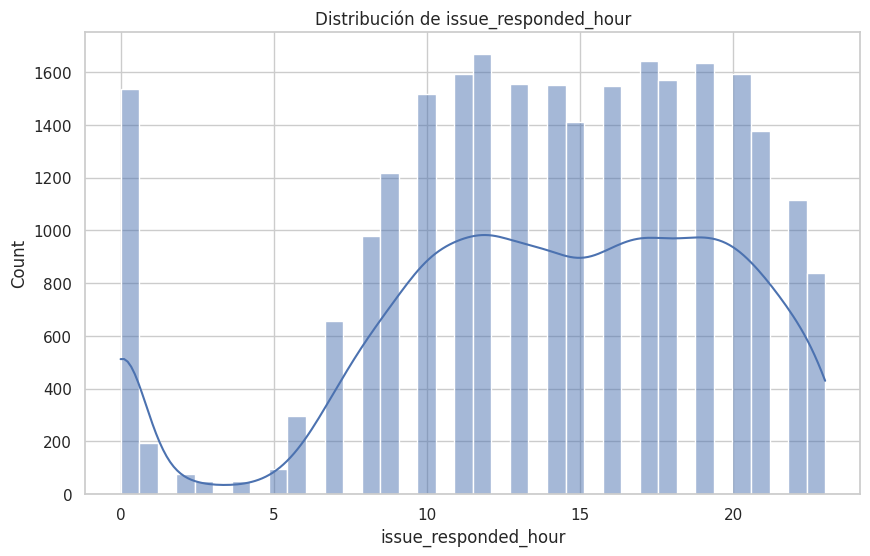

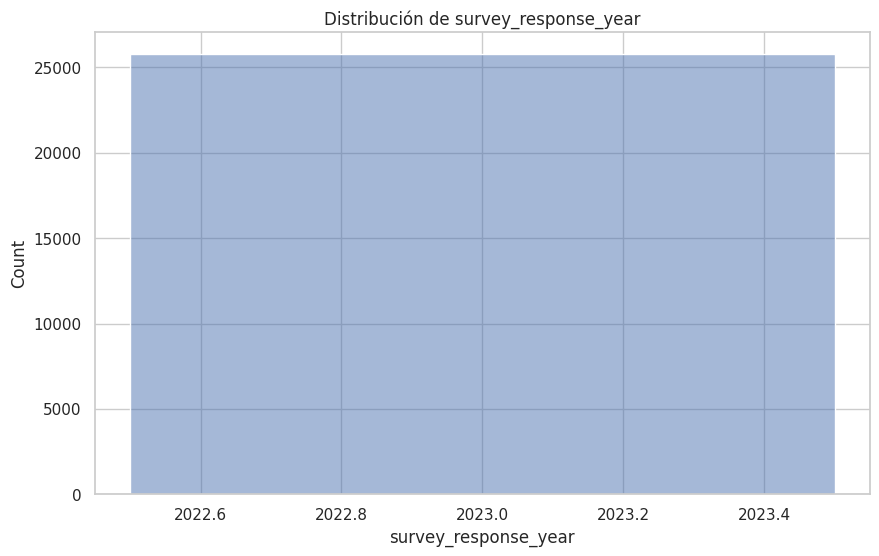

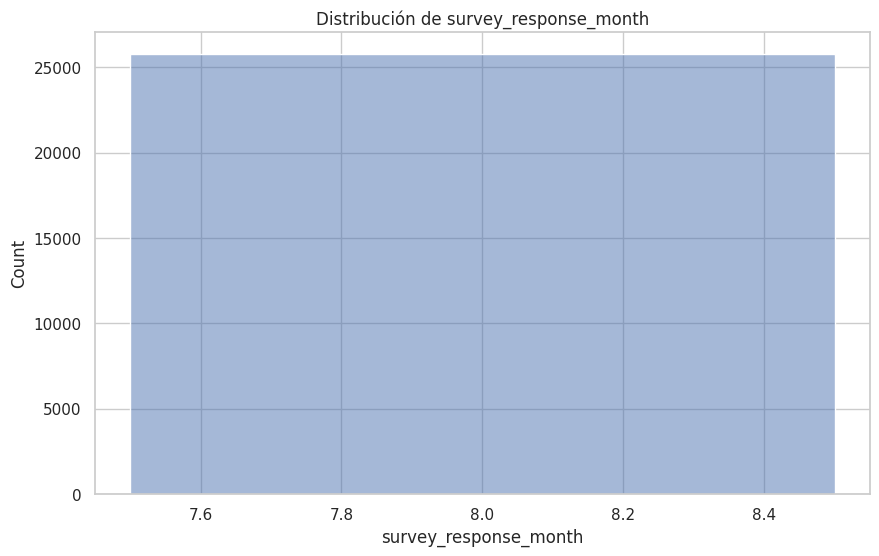

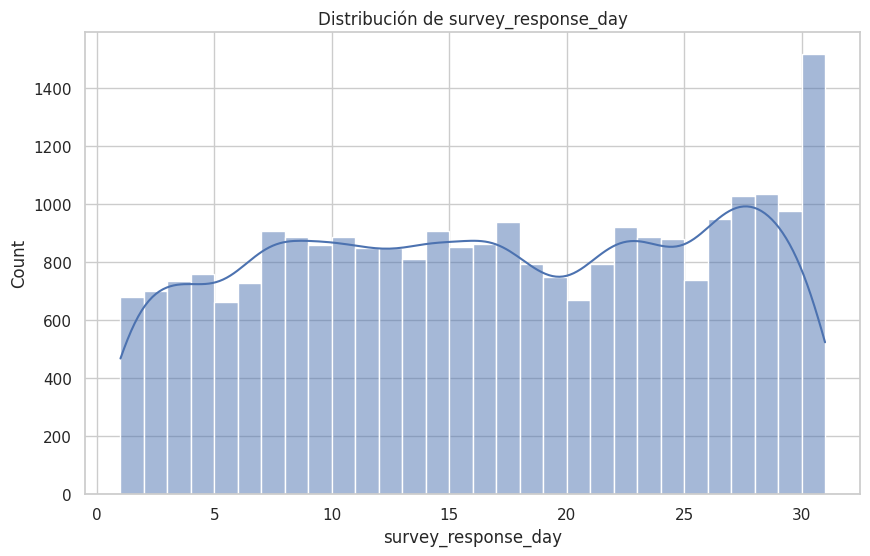

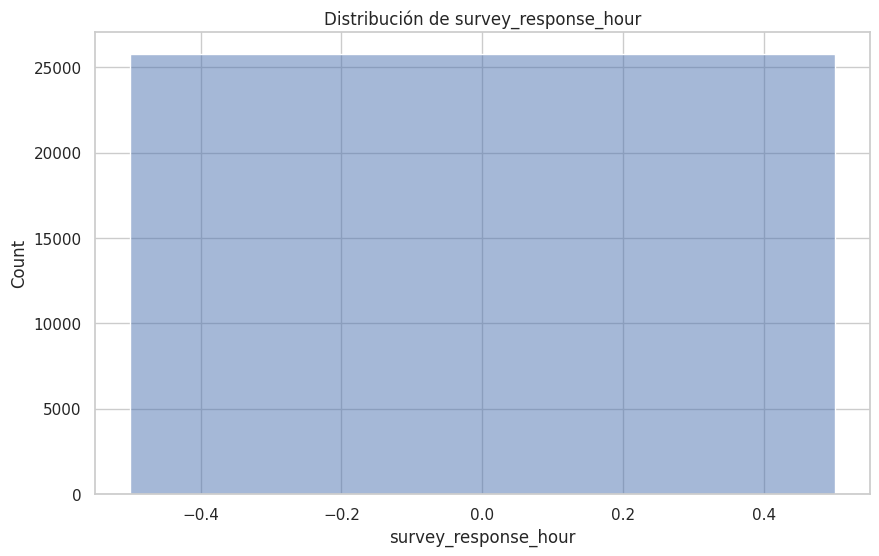

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

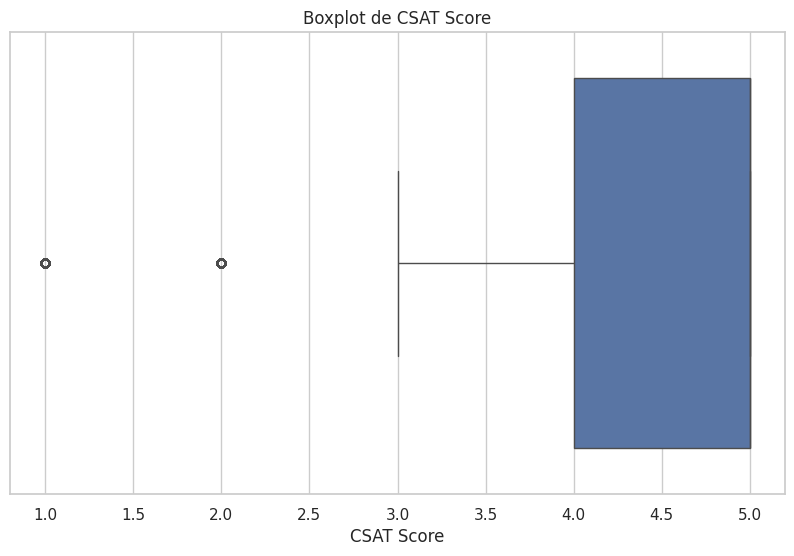

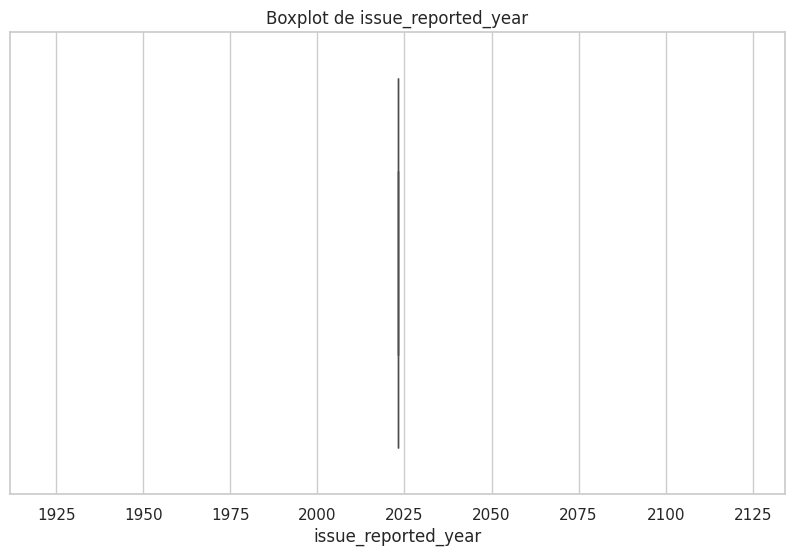

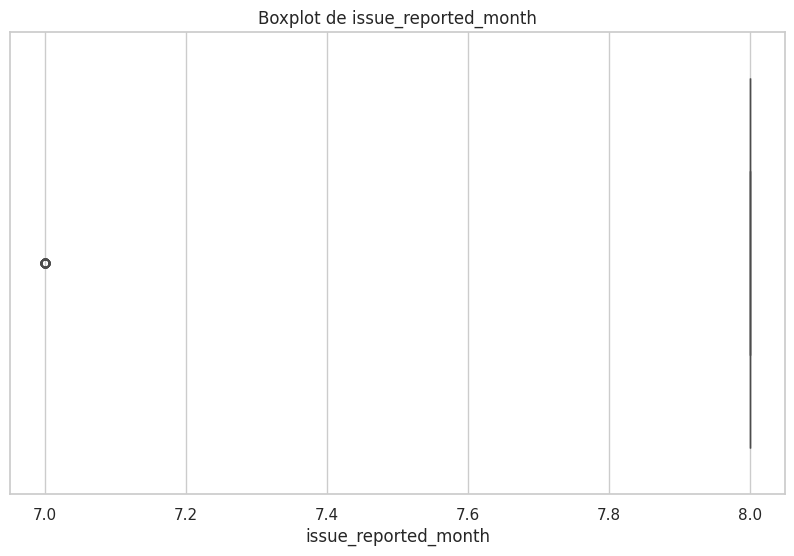

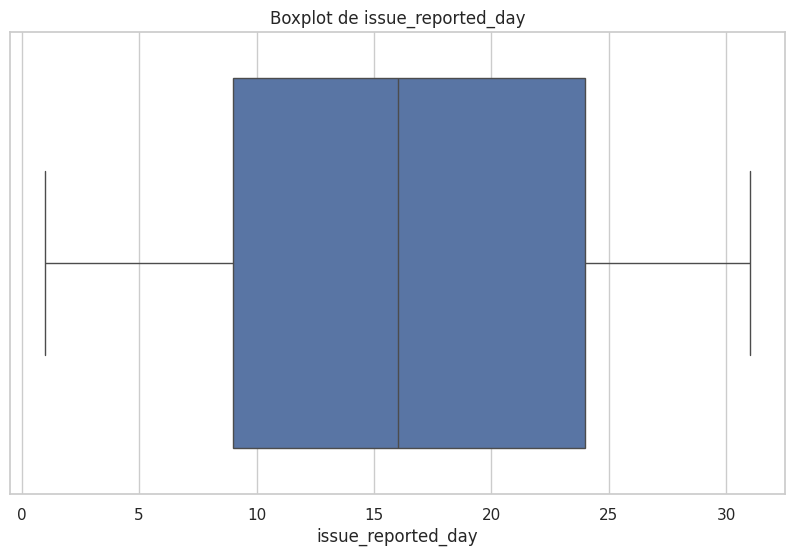

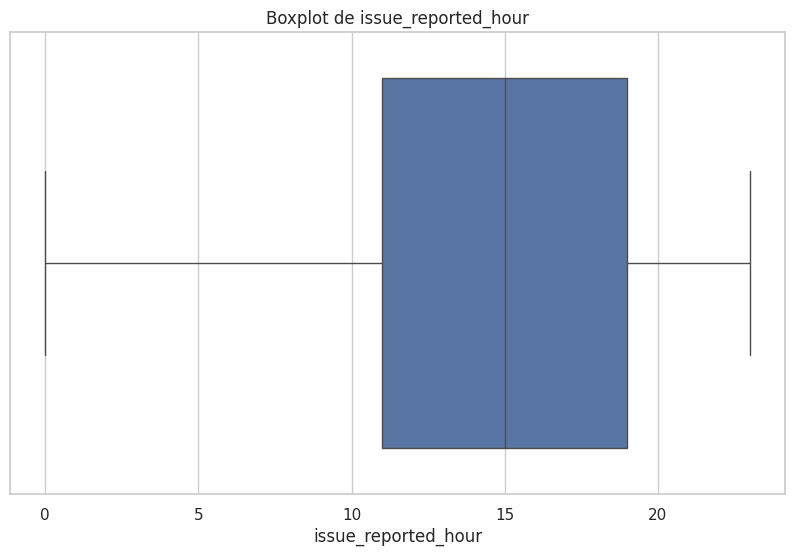

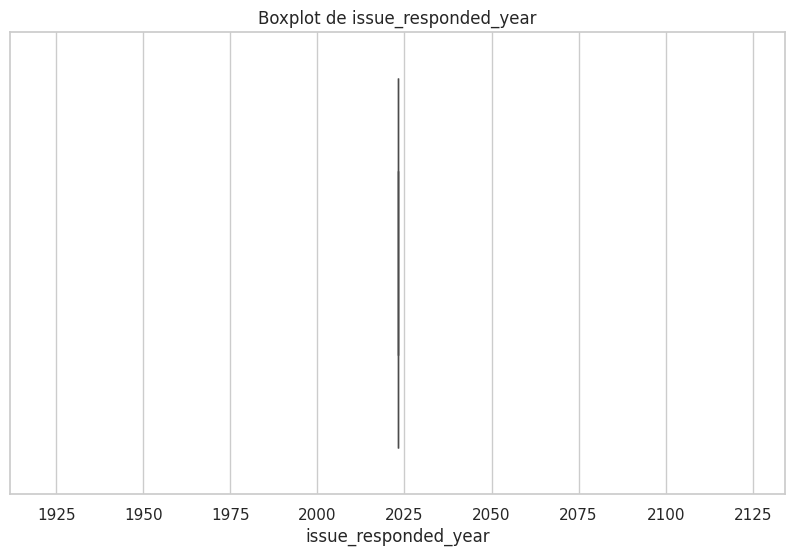

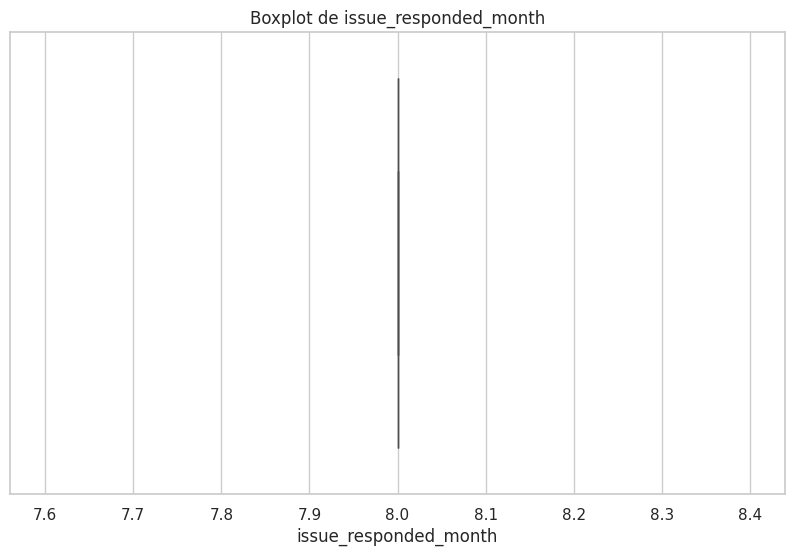

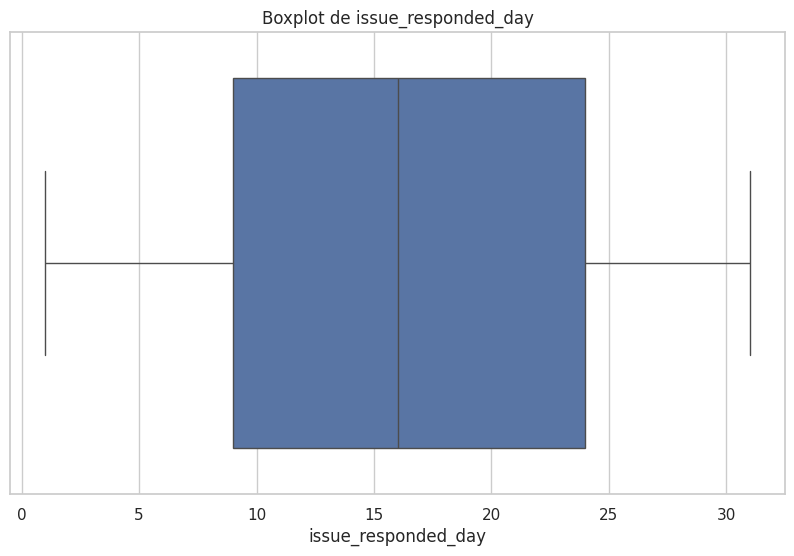

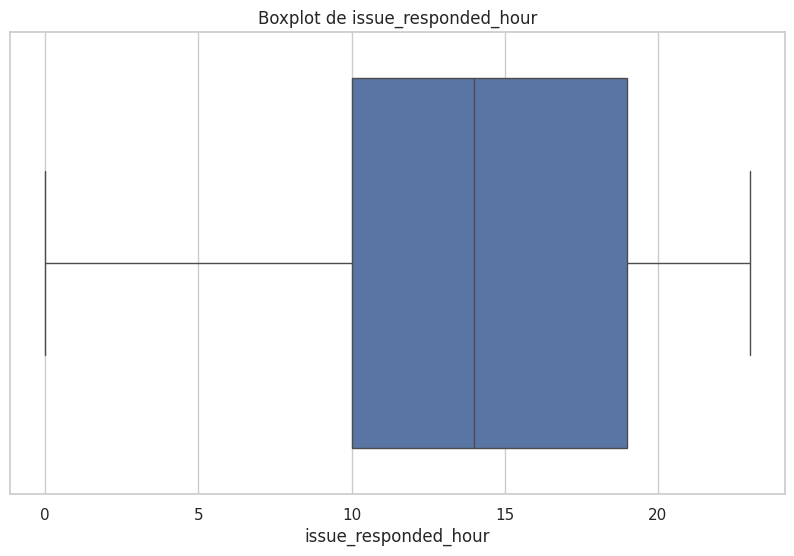

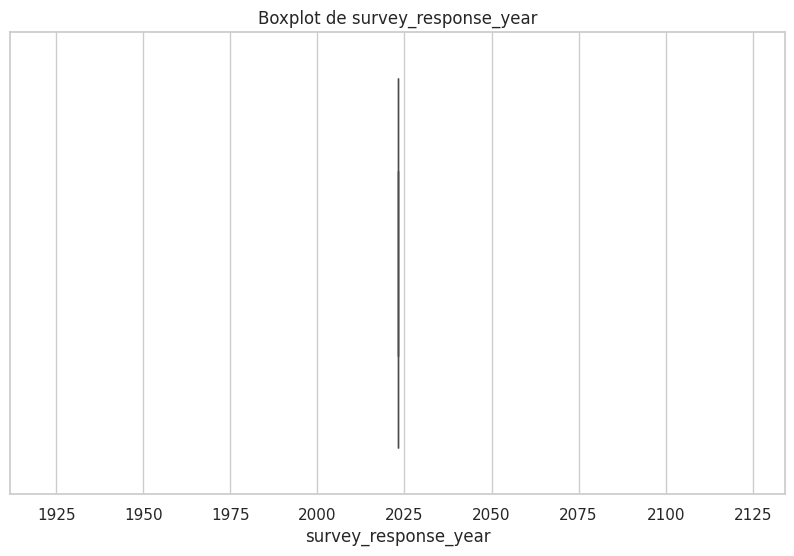

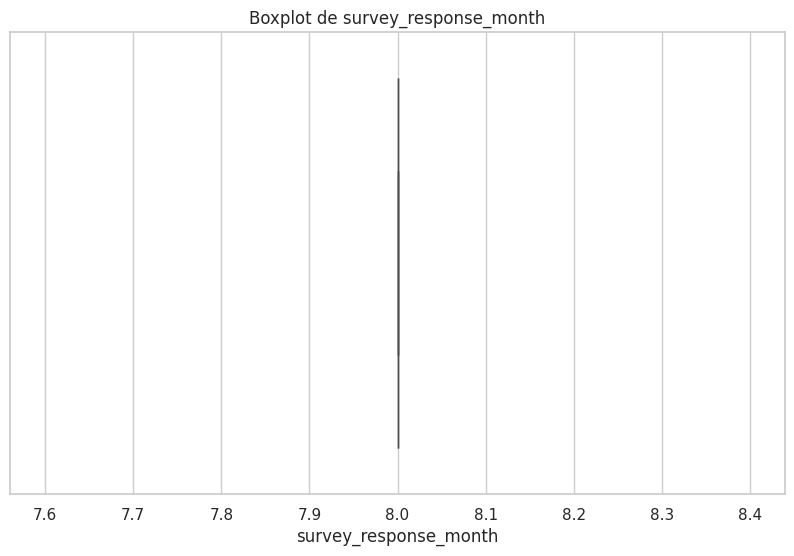

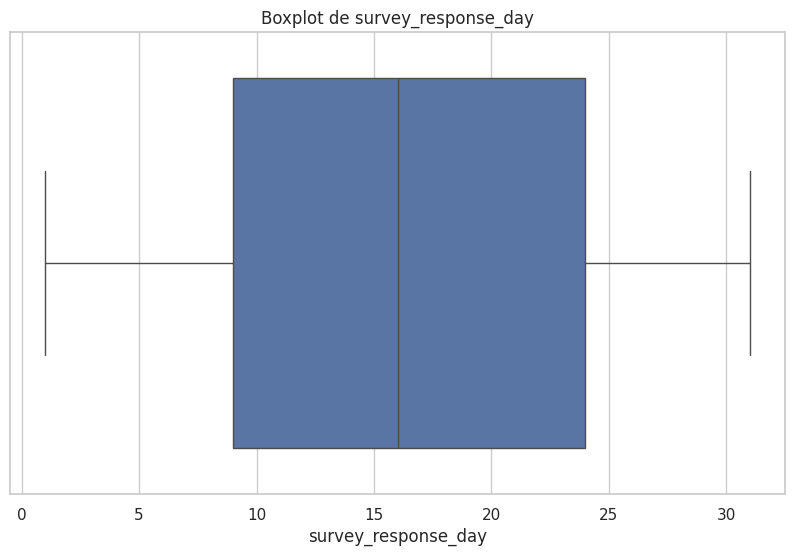

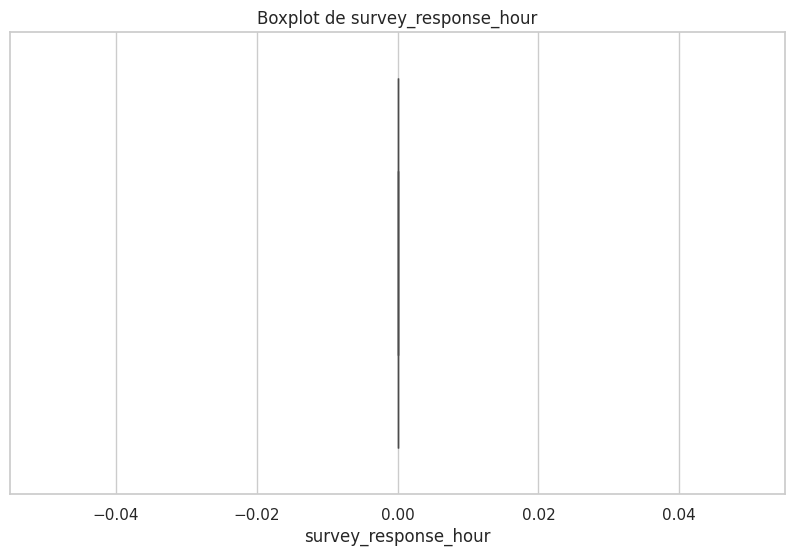

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

Para este conjunto de muestra no se registran outliers para las variables numéricas 

## Análisis Bivariado

In [ ]:
data.columns

Index(['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'issue_reported_year', 'issue_reported_month', 'issue_reported_day',
       'issue_reported_hour', 'issue_responded_year', 'issue_responded_month',
       'issue_responded_day', 'issue_responded_hour', 'survey_response_year',
       'survey_response_month', 'survey_response_day', 'survey_response_hour'],
      dtype='object')

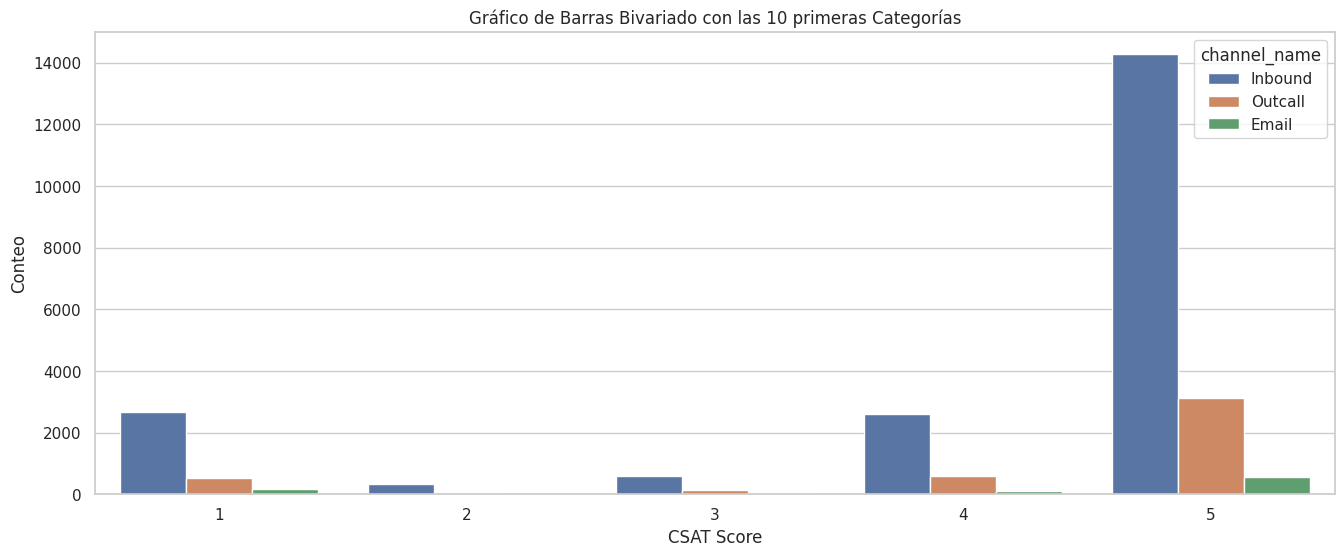

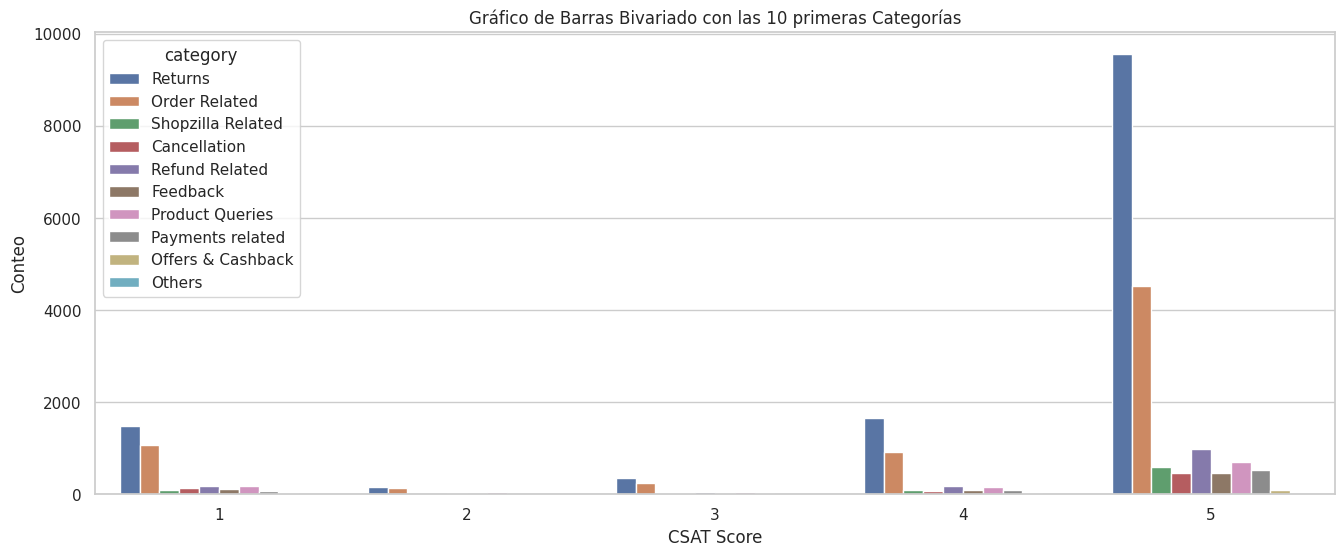

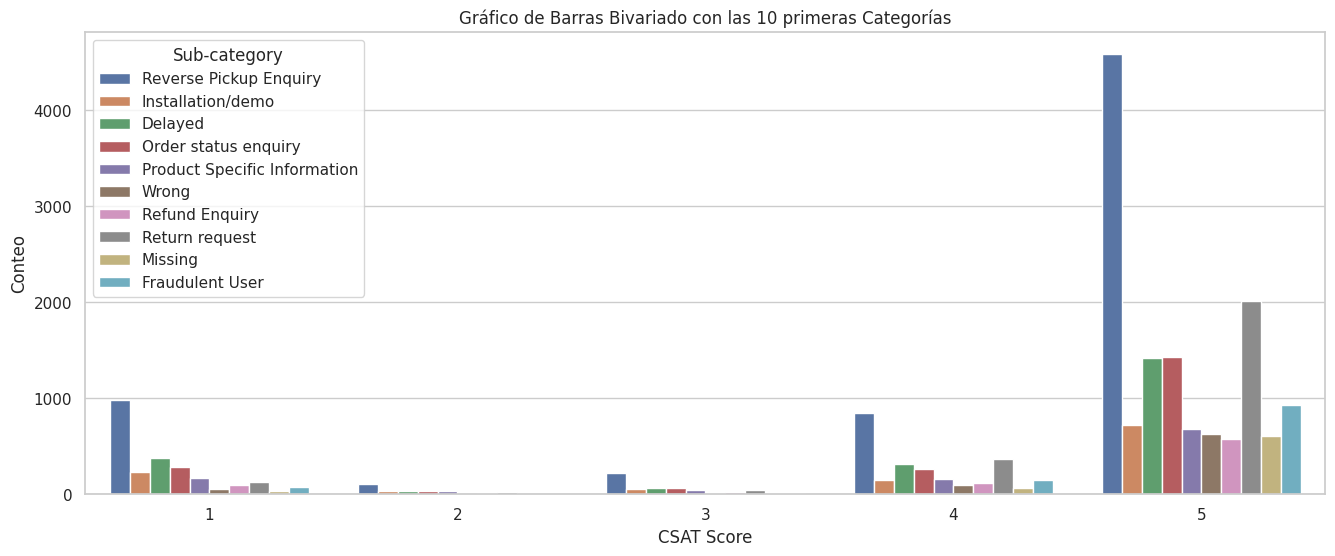

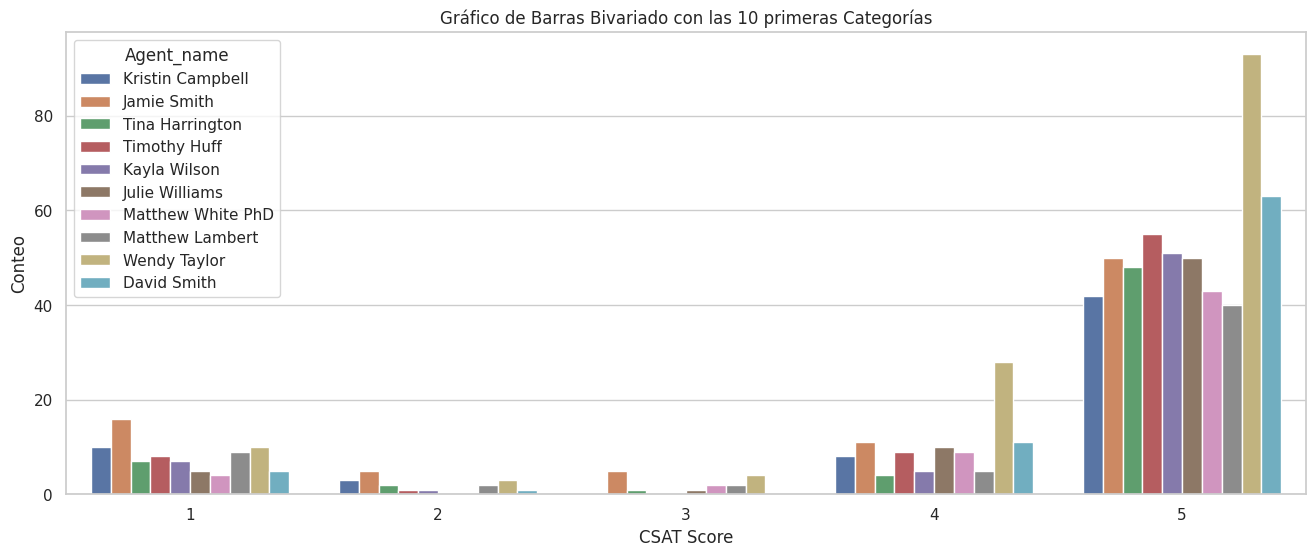

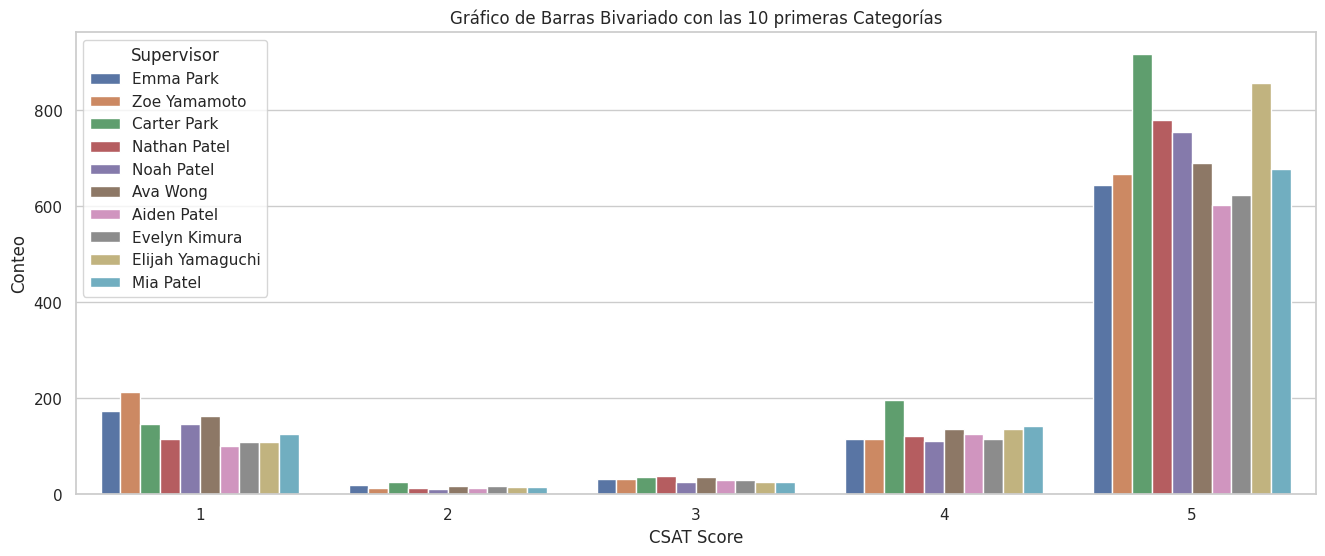

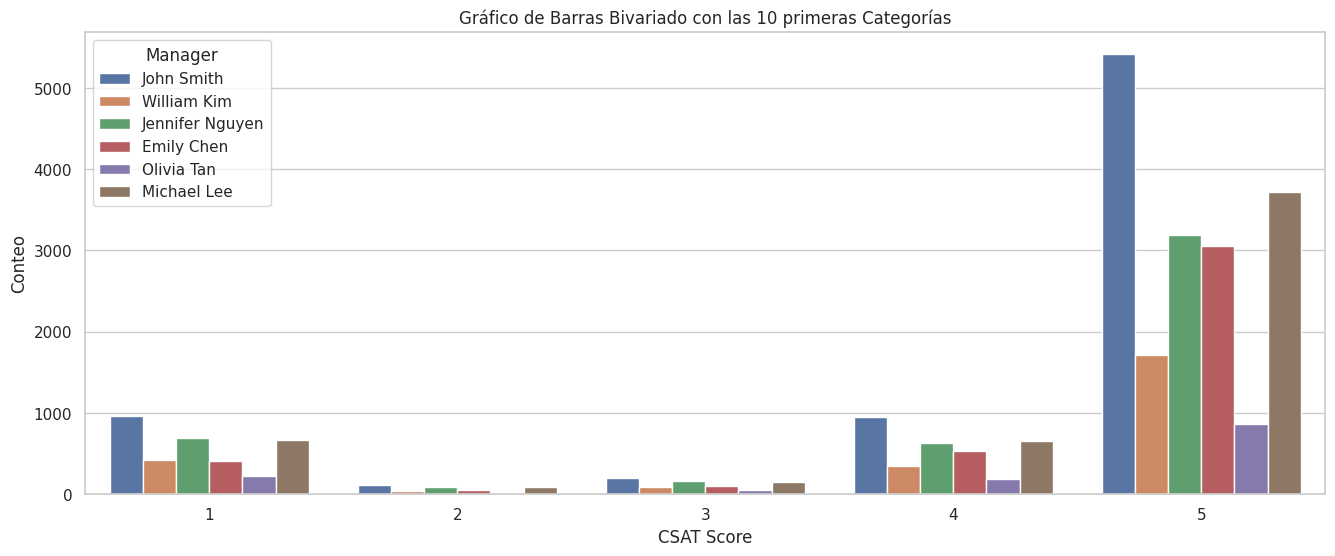

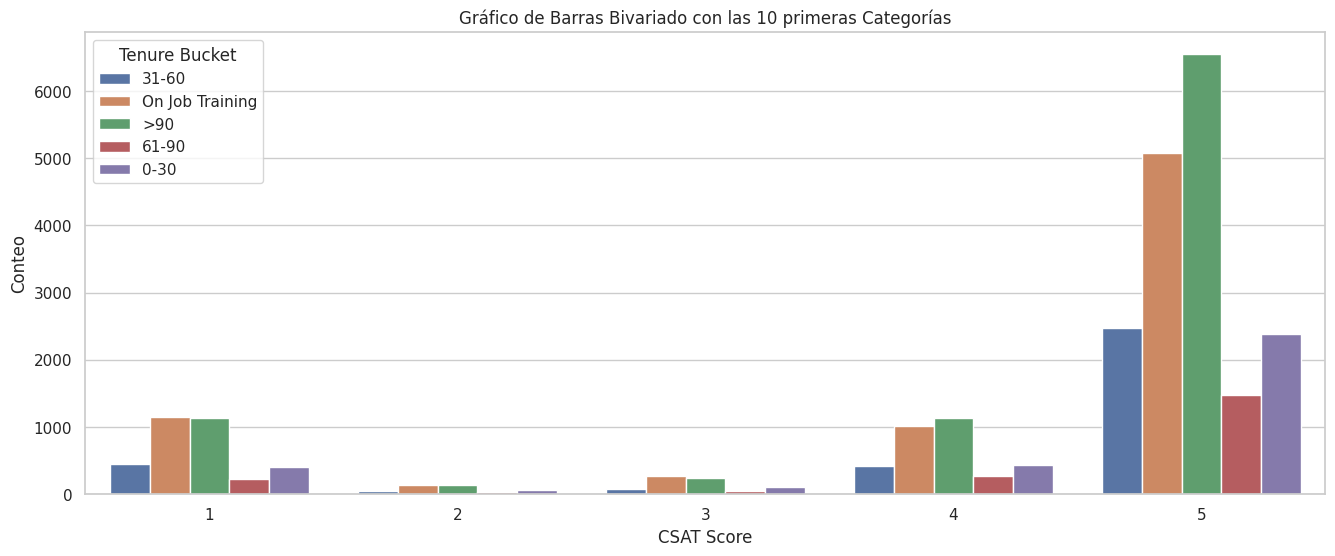

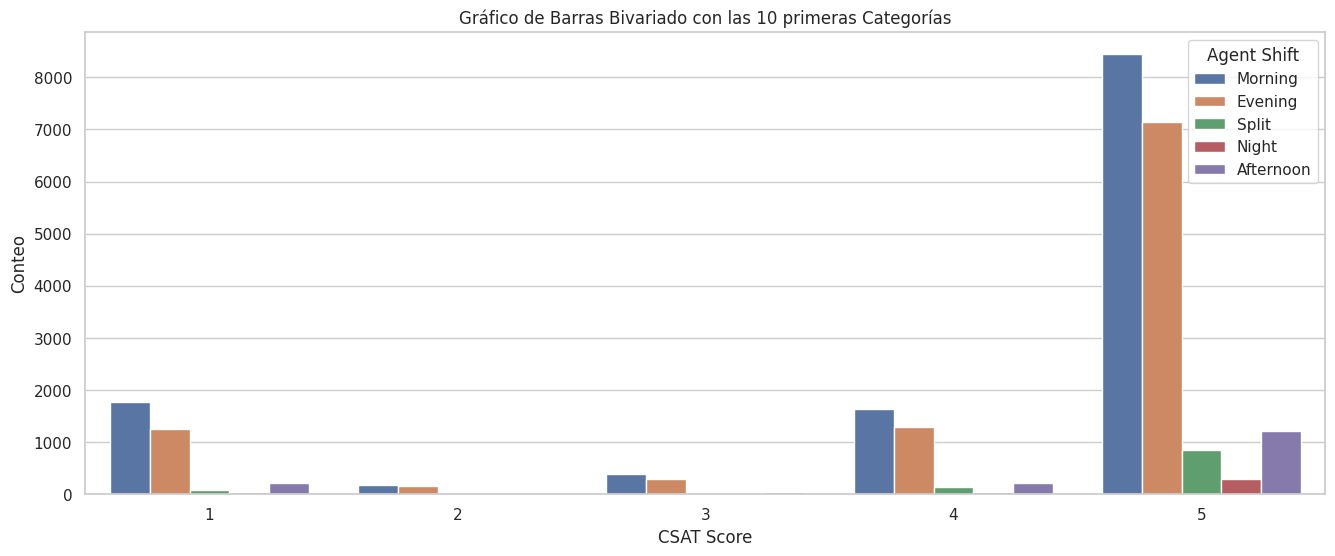

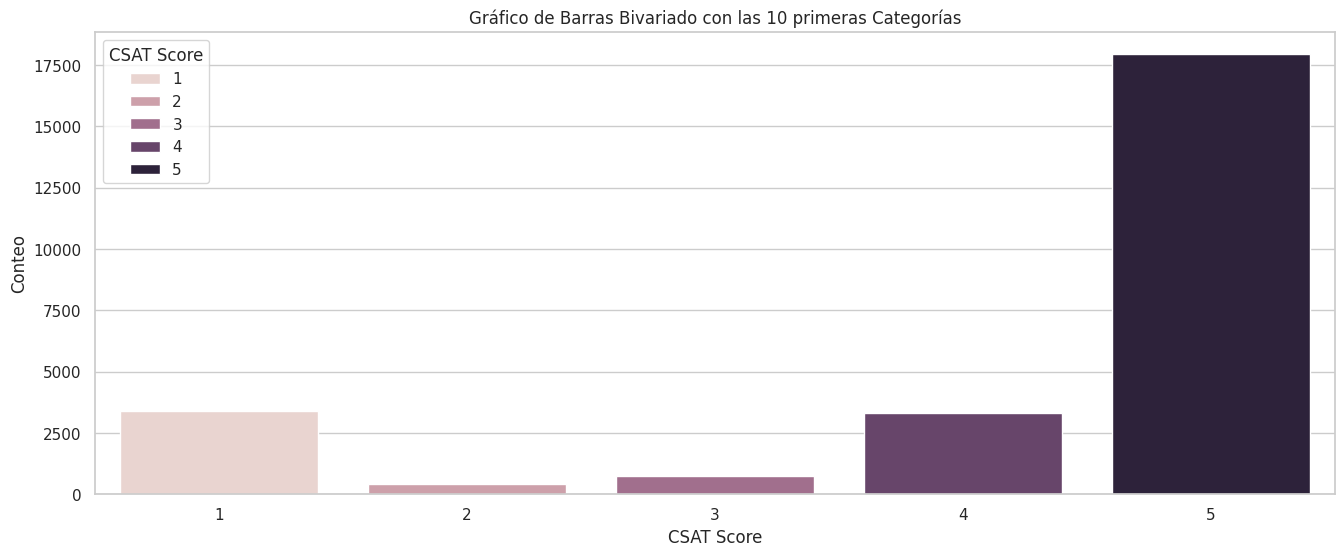

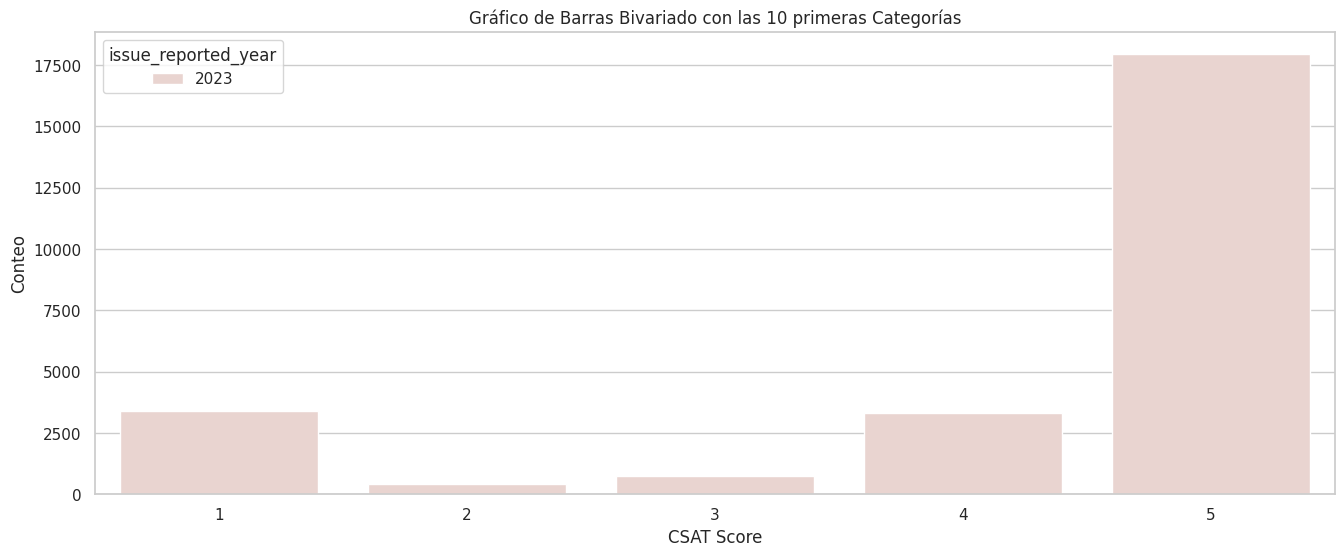

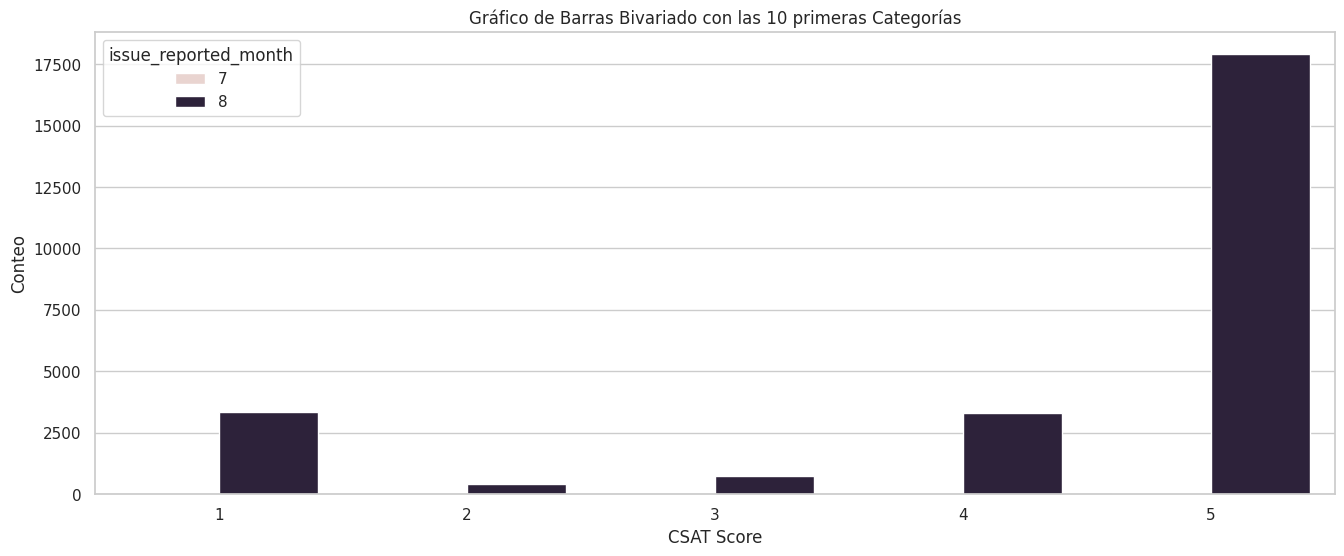

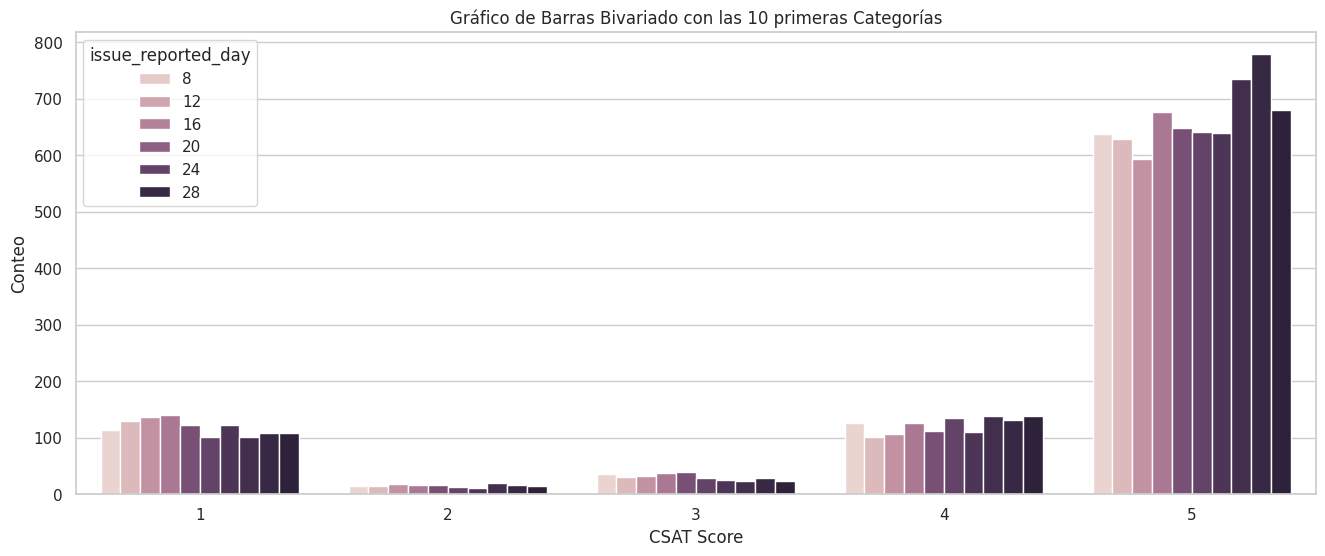

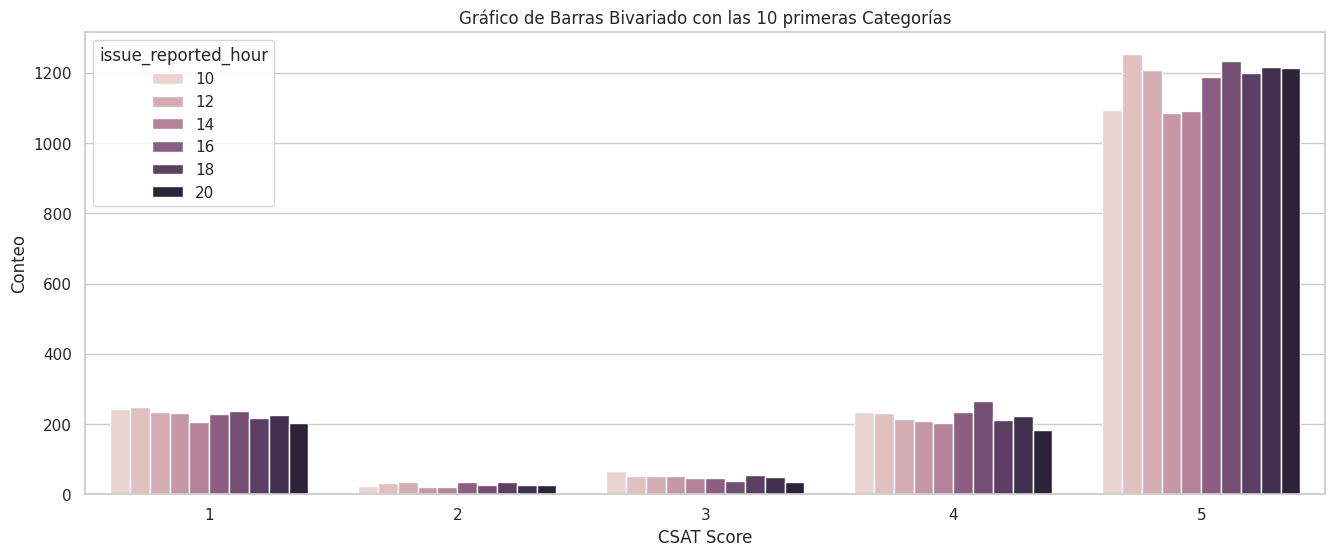

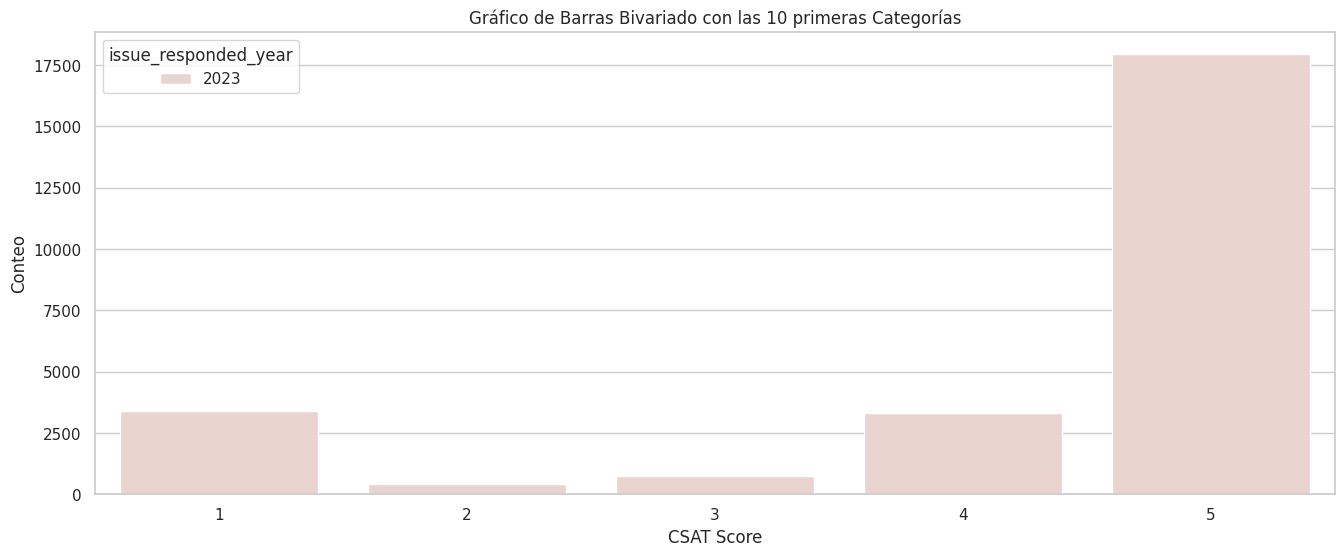

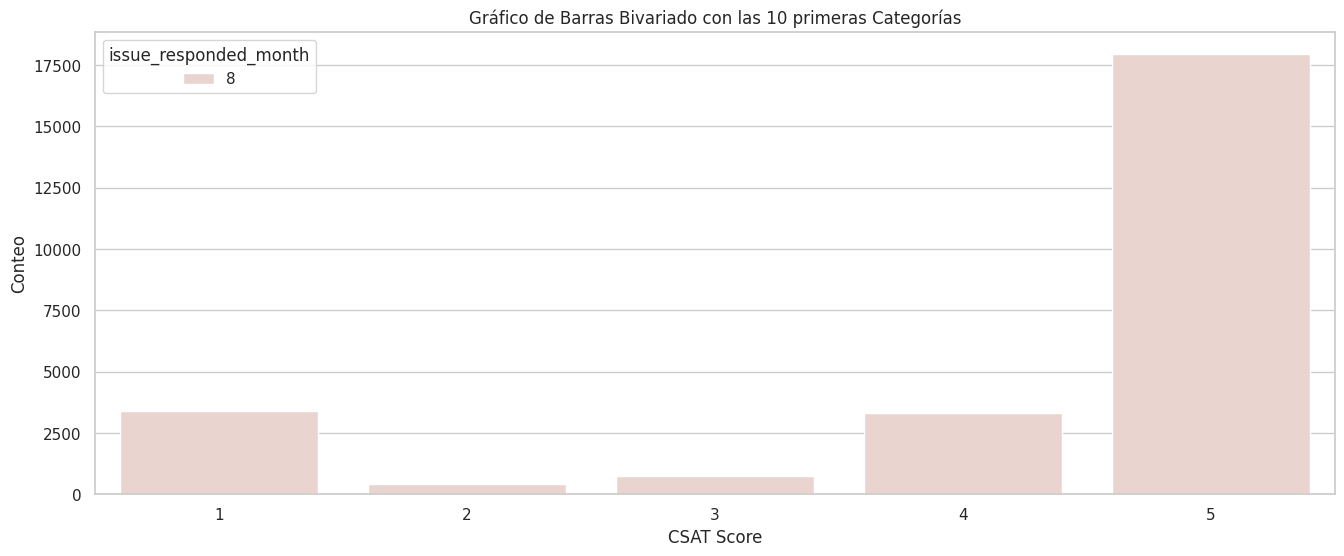

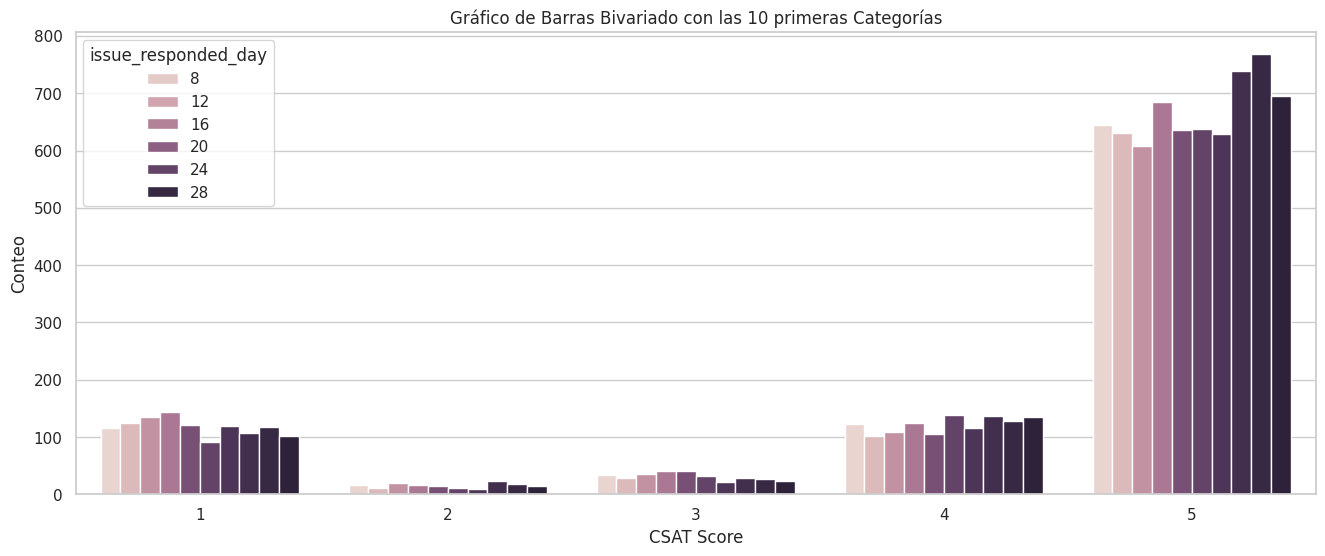

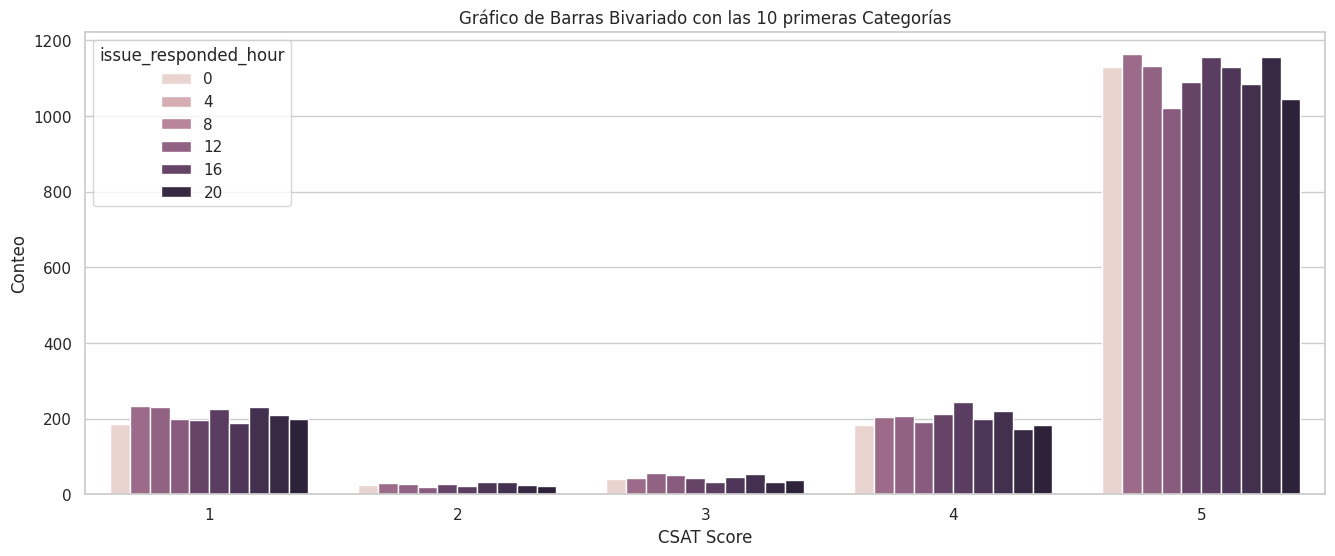

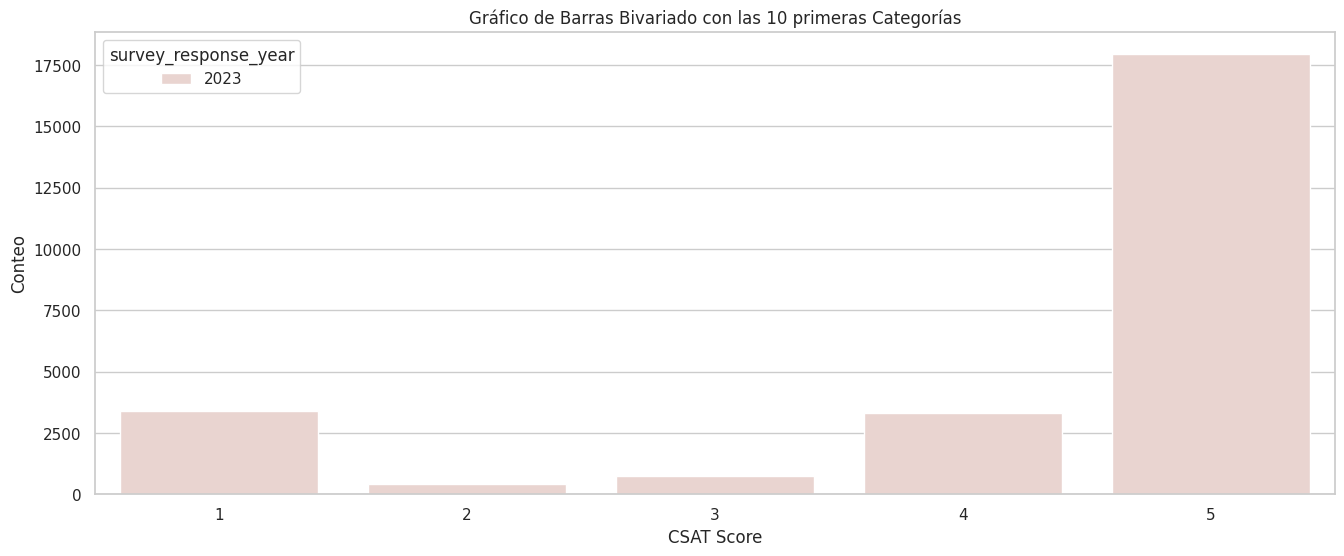

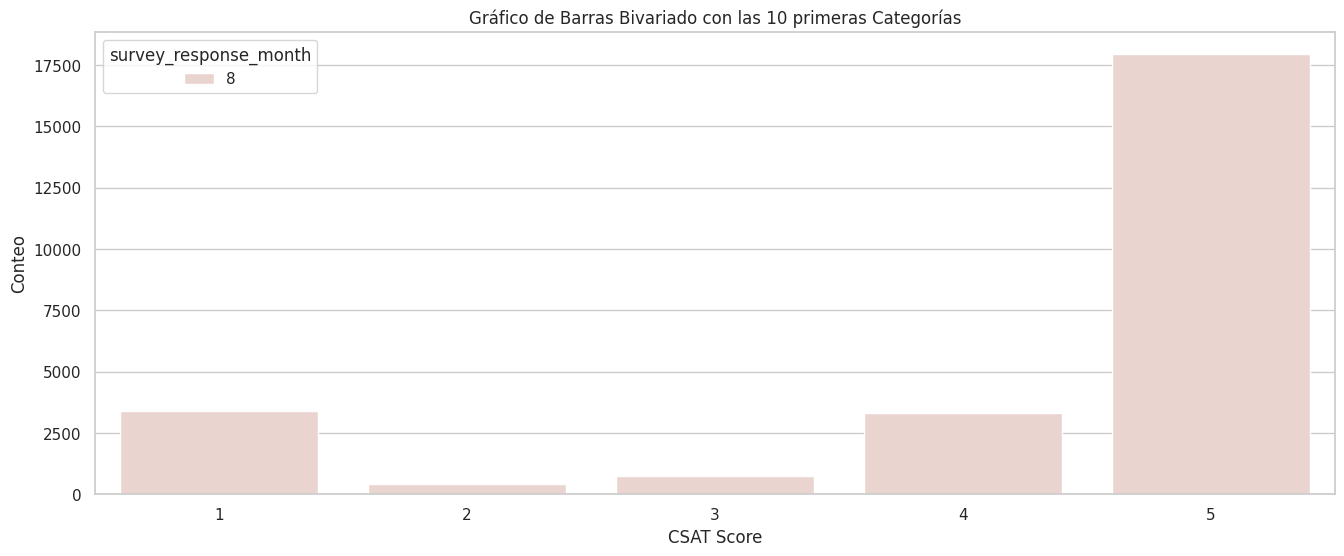

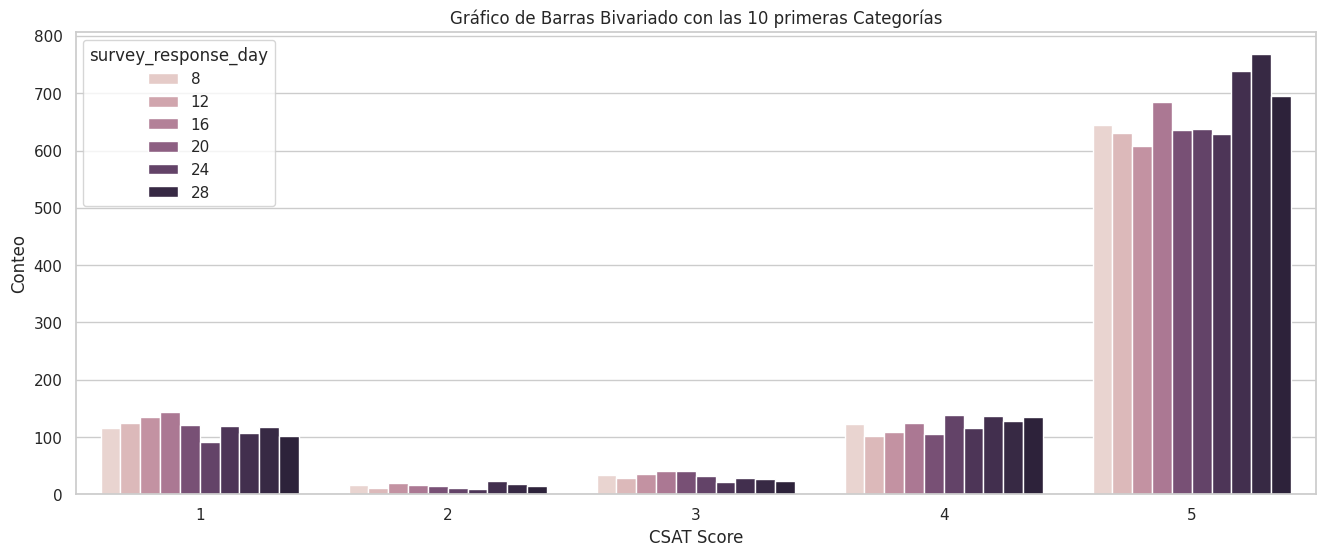

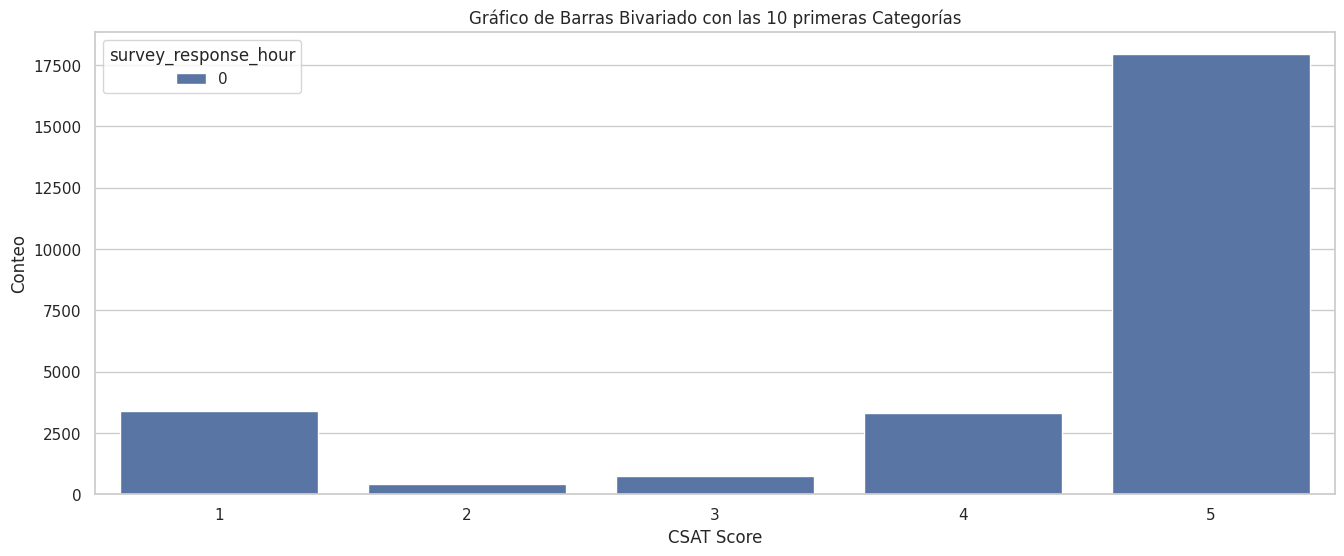

In [66]:
for column in data.columns:
    top_10_categories = data[column].value_counts().nlargest(10).index
    # Filtrar los datos para incluir solo las 10 primeras categorías
    filtered_data = data[data[column].isin(top_10_categories)]
    # Graficar un gráfico de barras bivariado con las 10 primeras categorías
    plt.figure(figsize=(16, 6))
    sns.countplot(data=filtered_data, x='CSAT Score', hue=column)
    plt.title('Gráfico de Barras Bivariado con las 10 primeras Categorías')
    plt.xlabel('CSAT Score')
    plt.ylabel('Conteo')
    plt.legend(title=column)
    plt.show()

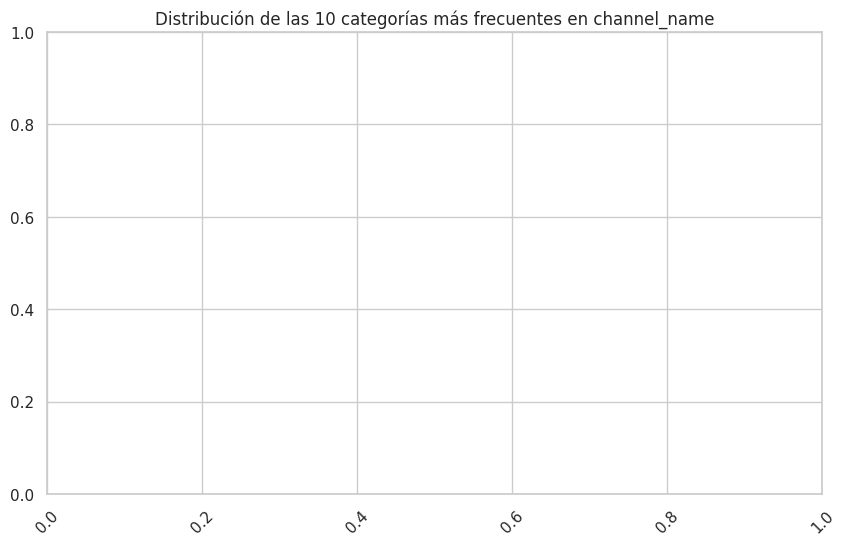

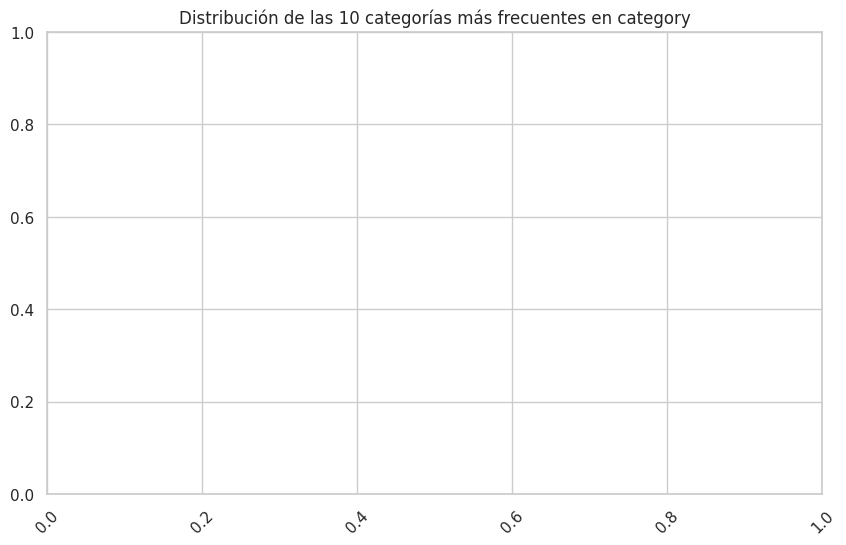

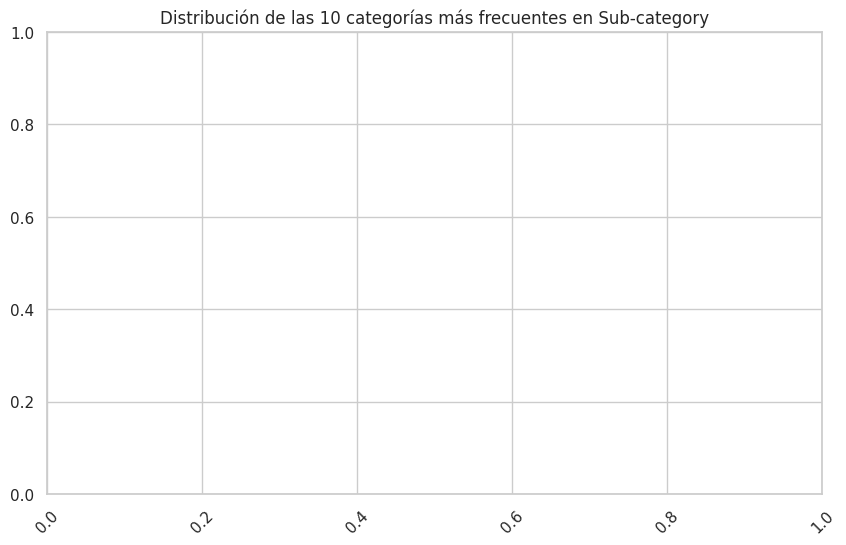

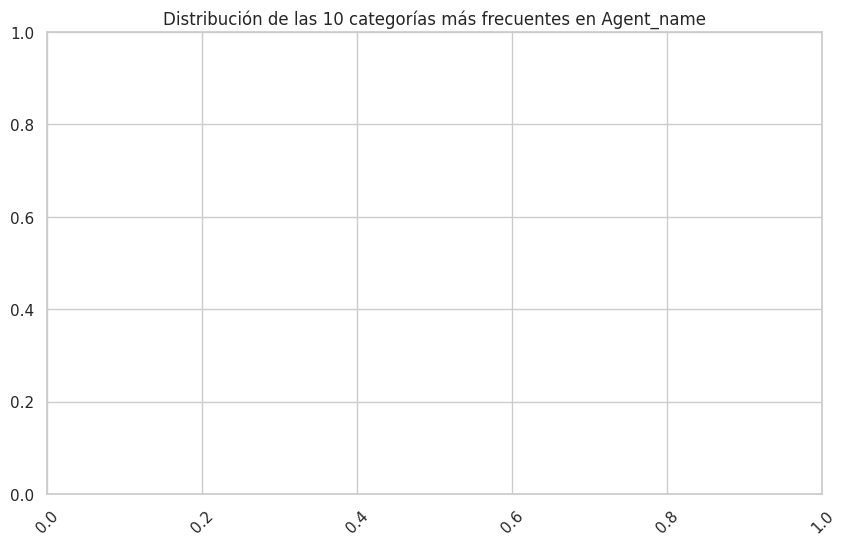

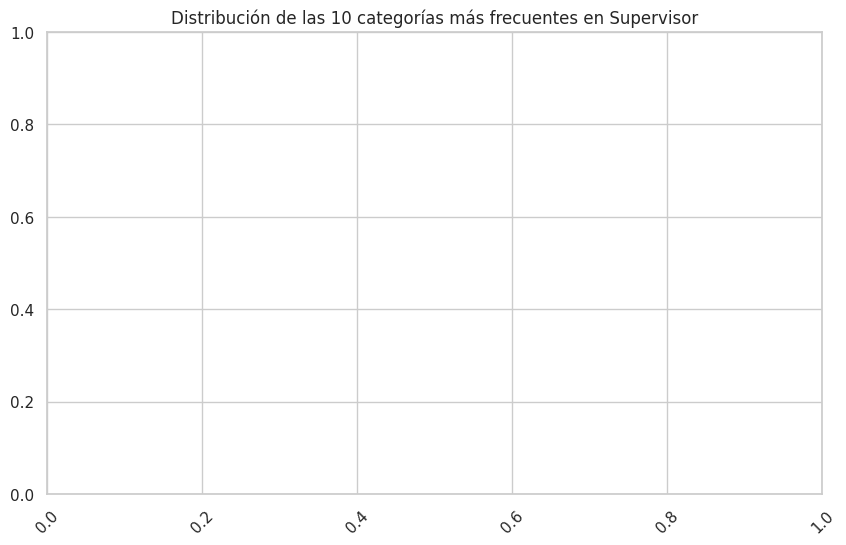

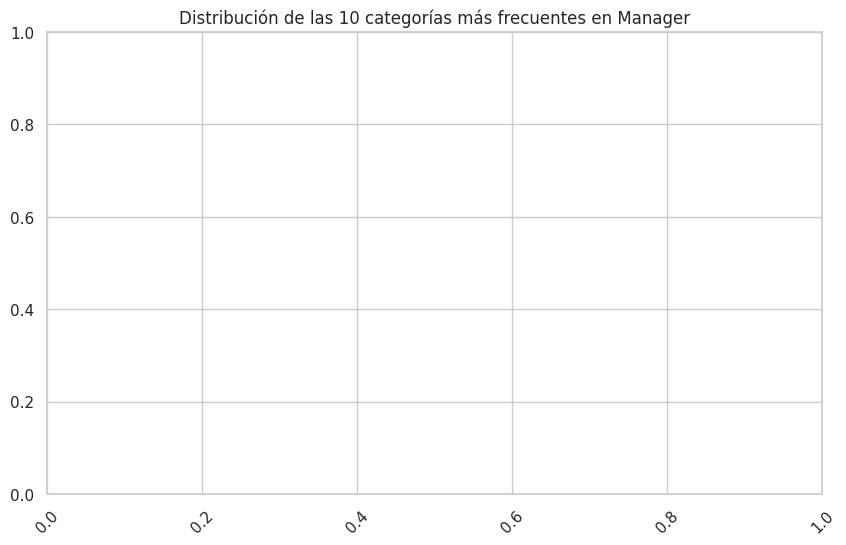

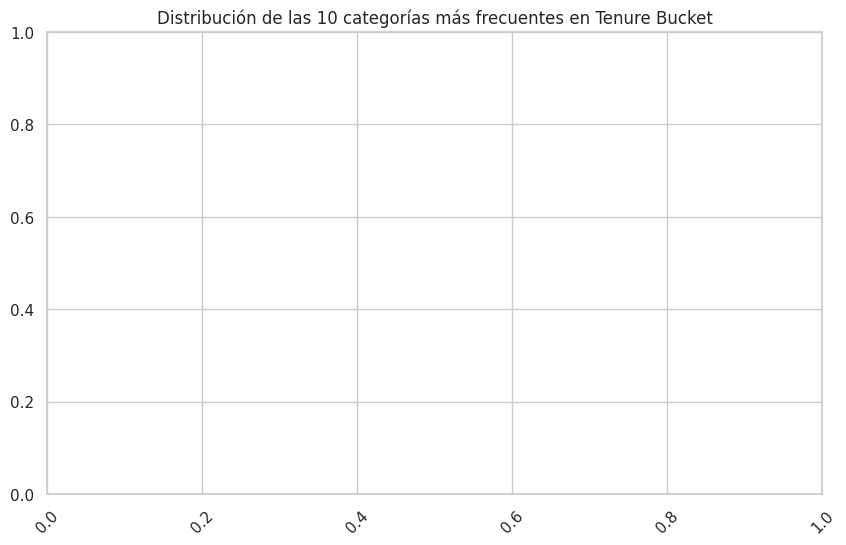

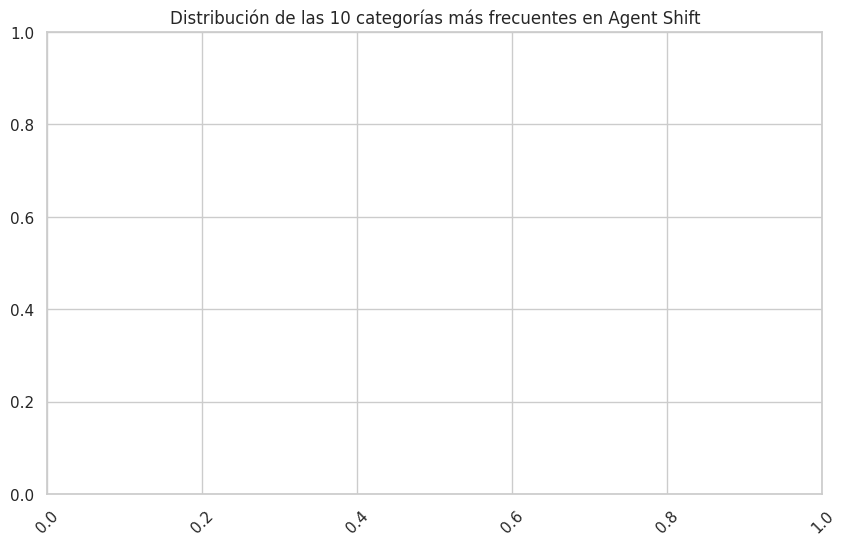

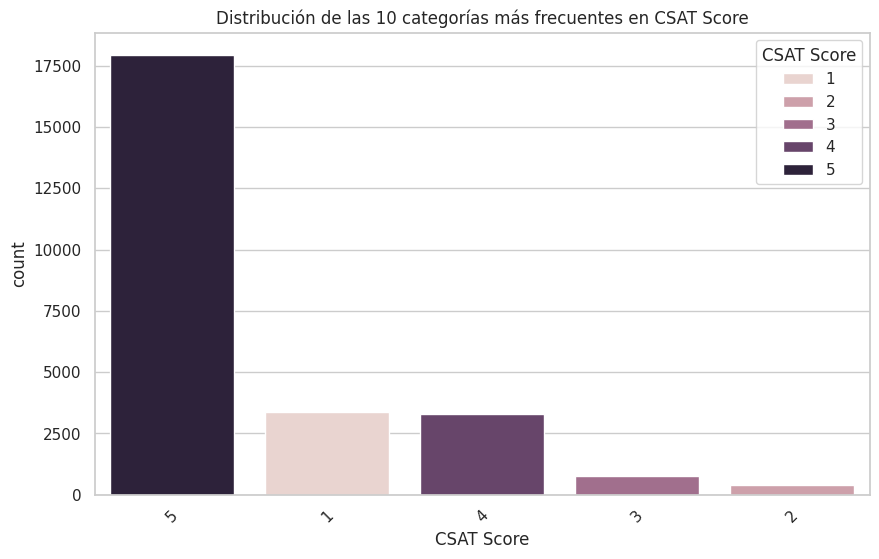

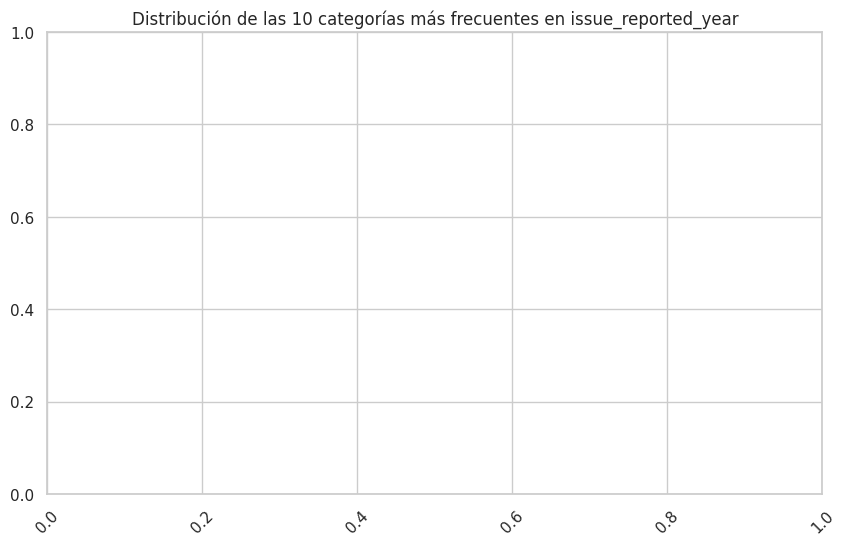

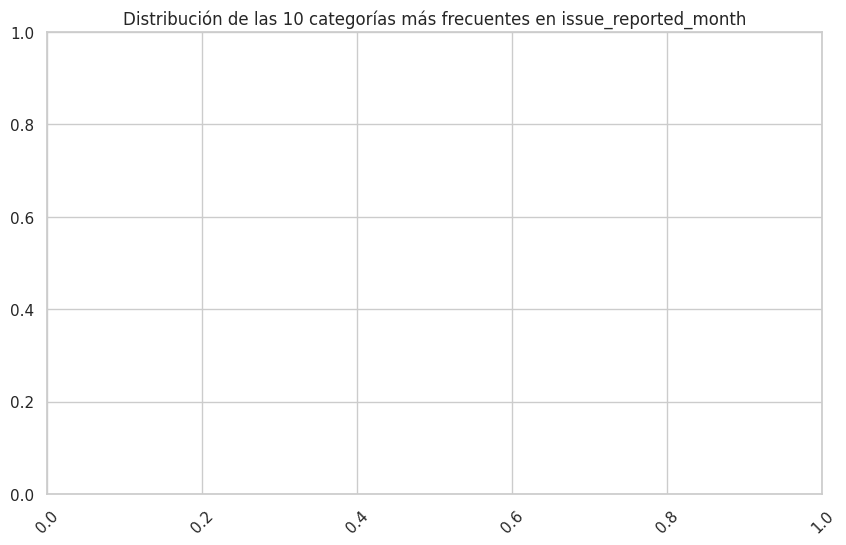

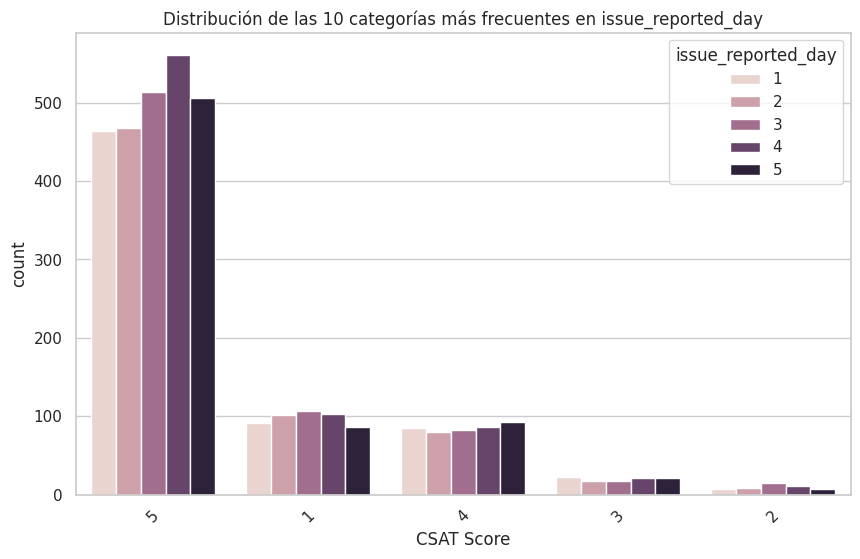

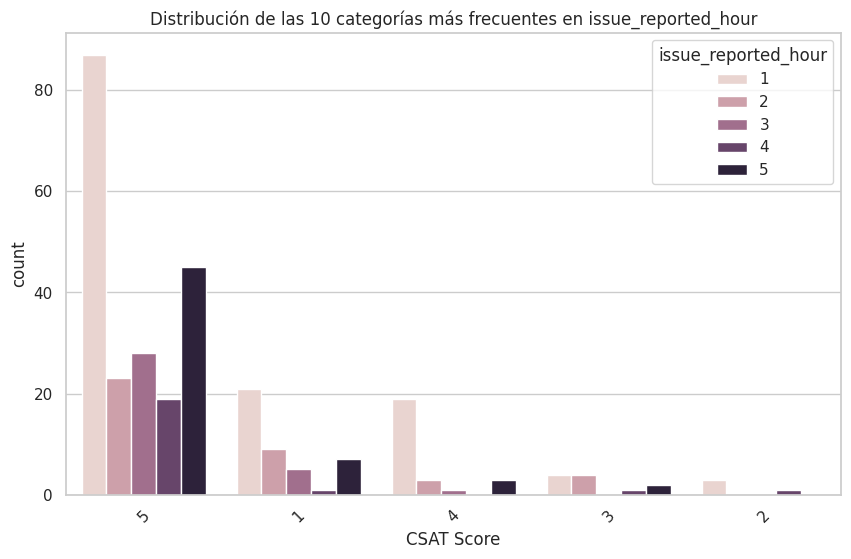

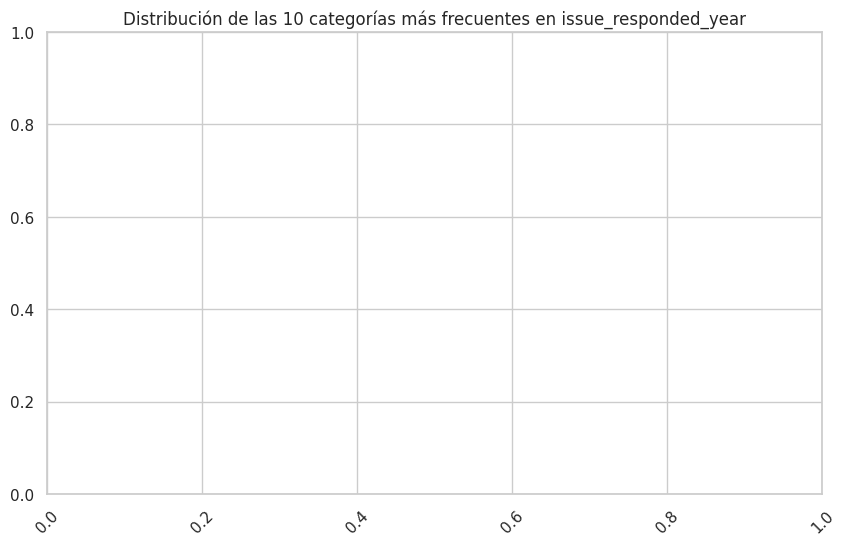

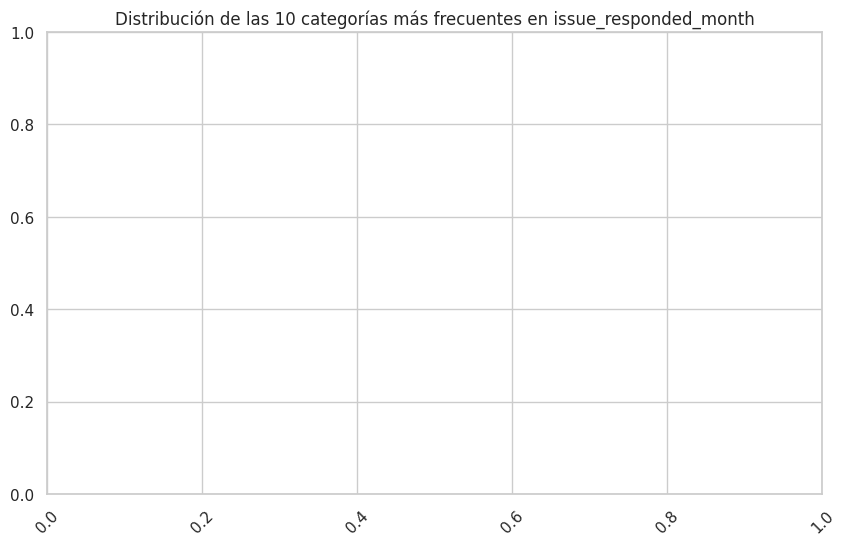

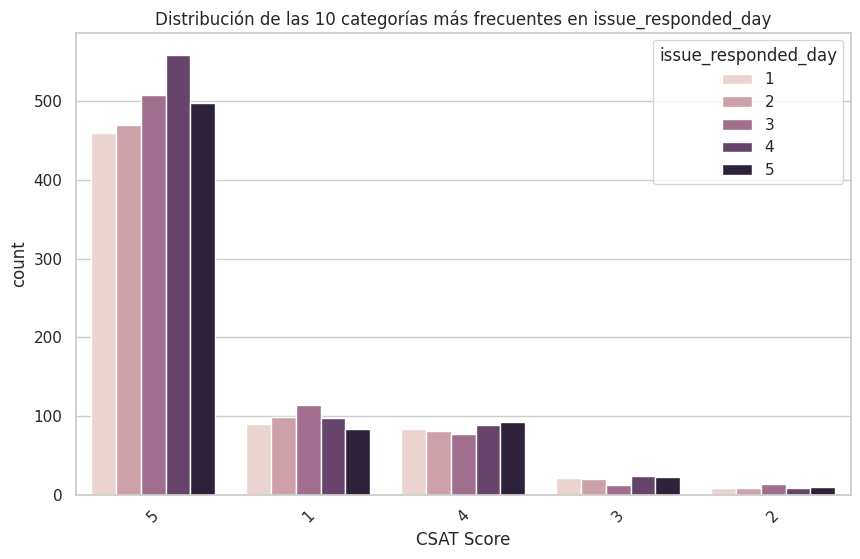

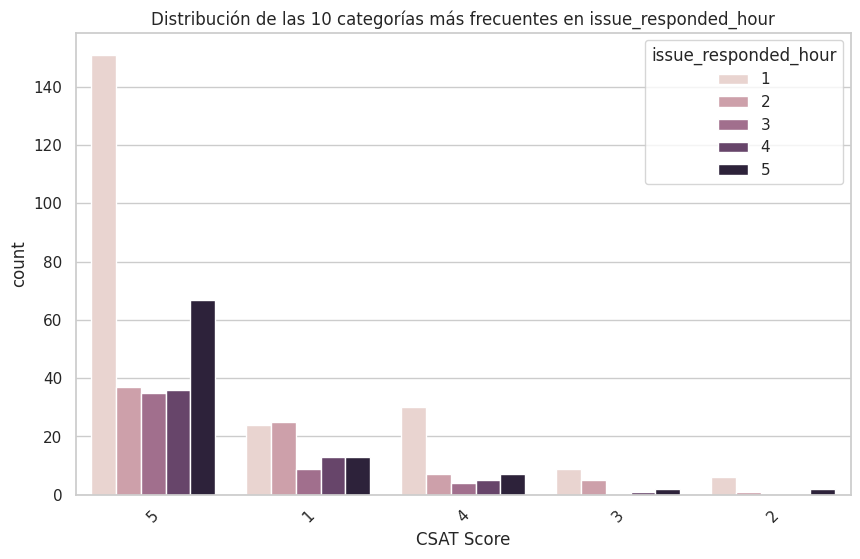

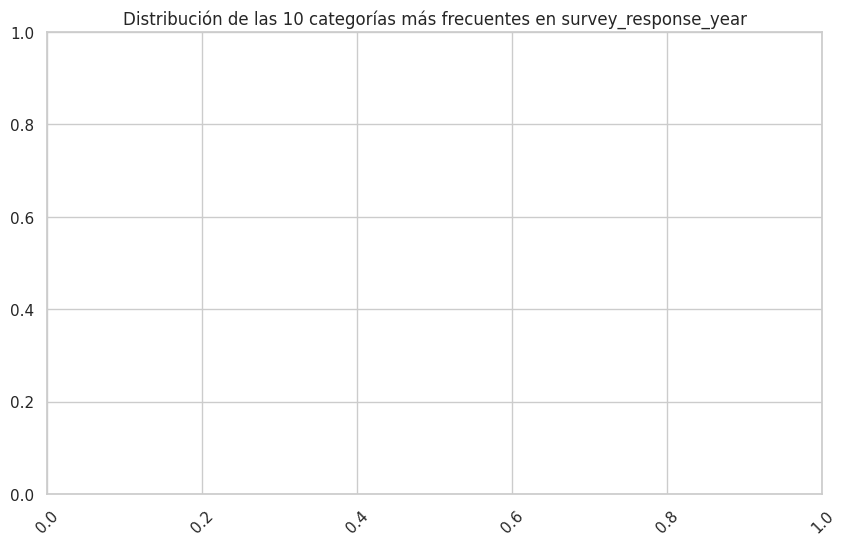

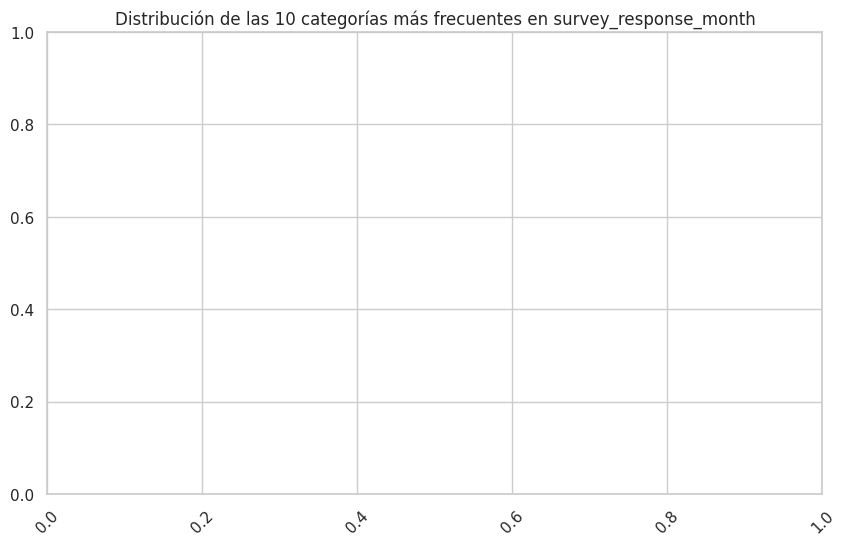

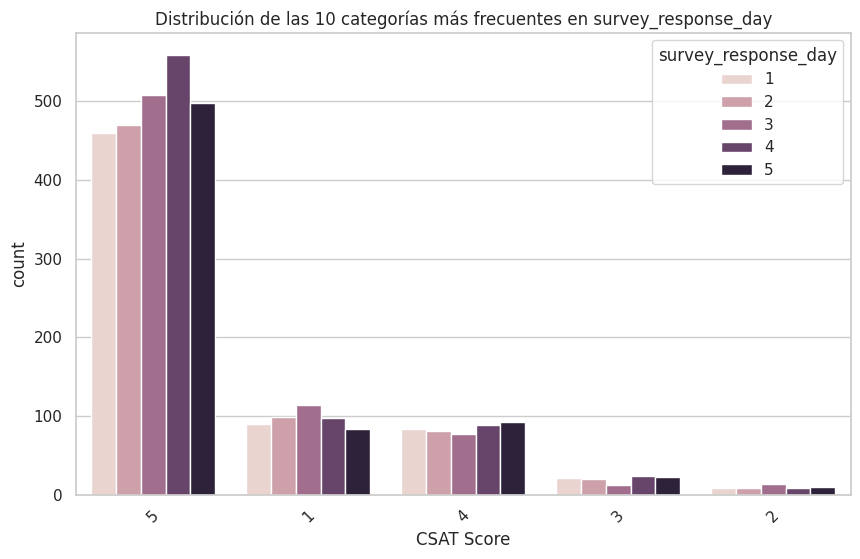

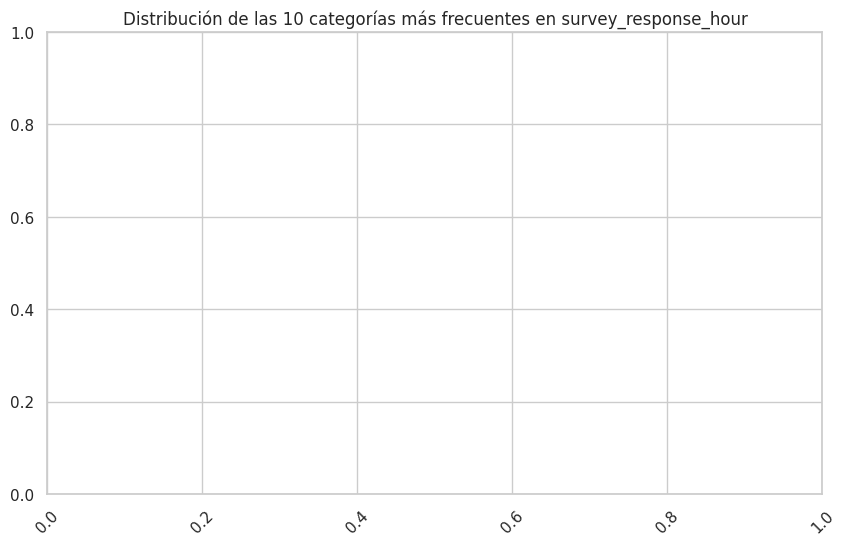

In [51]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    # Obtener las 10 categorías más frecuentes
    top_10 = data['CSAT Score'].value_counts().nlargest(10).index
    # Filtrar el DataFrame para incluir solo estas categorías
    filtered_data = data[data[column].isin(top_10)]
    sns.countplot(hue=column,x='CSAT Score',data=filtered_data, order=top_10)
    plt.title(f'Distribución de las 10 categorías más frecuentes en {column}')
    plt.xticks(rotation=45)
    plt.show()